In [33]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [34]:
SUBGRAPH_API_URL = "https://api.thegraph.com/subgraphs/name/papercliplabs/compound-v3"

sg = Subgrounds()

comp_v3 = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())


/var/folders/q3/3f7l37mx6xxgf9mq9l_t26f00000gn/T/ipykernel_25719/3950239521.py:3: ResourceWarning: unclosed <ssl.SSLSocket fd=75, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.2.0.2', 49673)>
  sg = Subgrounds()


2023-10-11


In [35]:
# Protocol Current

protocols = comp_v3.Query.protocols()

overview_df = sg.query_df([protocols])
print("Overview")
display(overview_df.T)

markets_df = sg.query_df([protocols.markets])
print("Market Proxy Addresses")
display(markets_df)

accounting_df = sg.query_df([protocols.accounting])
print("Accounting")
display(accounting_df.T)

usage_df = sg.query_df([protocols.cumulativeUsage])
print("Usage")
display(usage_df.T)


Overview


0
protocols_id                          0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_configuratorProxy           0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_configuratorImplementation  0xcfc1fa6b7ca982176529899d99af6473ad80df4f
protocols_accounting_id               0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_cumulativeUsage_id            0x50524f544f434f4c5f43554d554c4154495645

Market Proxy Addresses


protocols_markets_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                 protocols_markets_cometProxy  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                protocols_markets_protocol_id  \
0  0x316f9708bb98af7da9c68c1c3b5e79039cd336e3   
1  0x316f9708bb98af7da9c68c1c3b5e79039cd336e3   

   protocols_markets_creationBlockNumber  \
0                               16477039   
1                               15331596   

           protocols_markets_configuration_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

              protocols_markets_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                                           protocols_markets_cumulativeUsage_id  
0  0x4d41524b45545f43554d554c4154495645a17581a9e3356d9a858b789d68b4d866e593ae94  
1  0x4d41524b45545f43554d554c4154495645c3d688b66703497daa19211eedff47f25384cdc3

Accounting


0
protocols_accounting_id                            0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_accounting_protocol_id                   0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_accounting_lastUpdatedBlock                                                18329361
protocols_accounting_totalSupplyUsd                                          410818296.259315
protocols_accounting_totalBorrowUsd                                          350041242.655281
protocols_accounting_reserveBalanceUsd                                         4215245.703844
protocols_accounting_collateralBalanceUsd                                    650852112.593161
protocols_accounting_collateralReservesBalanceUsd                                   69.867686
protocols_accounting_totalReserveBalanceUsd                                     4215315.57153
protocols_accounting_utilization                                                     0.852059
protocols_accounting_collateralization                                               1.173628
protocols_accounting_avgSupplyApr                                                    0.028465
protocols_accounting_avgBorrowApr                                                    0.039378
protocols_accounting_avgRewardSupplyApr                                              0.011898
protocols_accounting_avgRewardBorrowApr                                              0.016275
protocols_accounting_avgNetSupplyApr                                                 0.040362
protocols_accounting_avgNetBorrowApr                                                 0.023102

Usage


0
protocols_cumulativeUsage_id                         0x50524f544f434f4c5f43554d554c4154495645
protocols_cumulativeUsage_protocol_id              0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_cumulativeUsage_uniqueUsersCount                                               7643
protocols_cumulativeUsage_interactionCount                                              39487
protocols_cumulativeUsage_supplyBaseCount                                                9542
protocols_cumulativeUsage_withdrawBaseCount                                             11140
protocols_cumulativeUsage_liquidationCount                                                181
protocols_cumulativeUsage_supplyCollateralCount                                         13251
protocols_cumulativeUsage_withdrawCollateralCount                                        5331
protocols_cumulativeUsage_transferCollateralCount                                          42

In [36]:
# Market Current

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]
    print(market_name)

    market = comp_v3.Query.market(id=market_id)

    overview_df = sg.query_df([market])
    print(f"{market_name} - Overview")
    display(overview_df.T)

    config_df = sg.query_df([market.configuration])
    print(f"{market_name} - Config")
    display(config_df.T)

    accounting_df = sg.query_df([market.accounting])
    print(f"{market_name} - Accounting")
    display(accounting_df.T)

    collateral_bal_df = sg.query_df([market.collateralBalances.collateralToken.token.address, 
                                     market.collateralBalances.collateralToken.token.symbol, 
                                     market.collateralBalances.collateralToken, 
                                     market.collateralBalances])

    print(f"{market_name} - Collateral Balances")
    display(collateral_bal_df.T)

    usage_df = sg.query_df([market.cumulativeUsage])
    print(f"{market_name} - Usage")
    display(usage_df.T)

    positions_df = sg.query_df([market.positions])
    print(f"{market_name} - Positions")
    display(positions_df)

    interaction_df = sg.query_df([market.supplyBaseInteractions, 
                                market.withdrawBaseInteractions, 
                                market.absorbDebtInteractions,
                                market.supplyCollateralInteractions,
                                market.withdrawCollateralInteractions,
                                market.transferCollateralInteractions,
                                market.absorbCollateralInteractions])
    print(f"{market_name} - Interactions")
    [display(df) for df in interaction_df]


Compound WETH
Compound WETH - Overview


0
market_id                                                     0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_cometProxy                                             0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_protocol_id                                            0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_creationBlockNumber                                                                      16477039
market_configuration_id                                       0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_id                                          0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_cumulativeUsage_id   0x4d41524b45545f43554d554c4154495645a17581a9e3356d9a858b789d68b4d866e593ae94

Compound WETH - Config


0
market_configuration_id                                                                            0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_configuration_market_id                                                                     0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_configuration_cometImplementation                                                           0x7a1316220a46dce22fd5c6d55a39513367e6c967
market_configuration_lastConfigurationUpdateBlockNumber                                                                              17972006
market_configuration_name                                                                                                       Compound WETH
market_configuration_symbol                                                                                                           cWETHv3
market_configuration_factory                                                                       0xa7f7de6ccad4d83d81676717053883337ac2c1b4
market_configuration_governor                                                                      0x6d903f6003cca6255d85cca4d3b5e5146dc33925
market_configuration_pauseGuardian                                                                 0xbbf3f1421d886e9b2c5d716b5192ac998af2012c
market_configuration_extensionDelegate                                                             0xe2c1f54aff6b38fd9df7a69f22cb5fd3ba09f030
market_configuration_supplyKink                                                                                                           0.9
market_configuration_supplyPerSecondInterestRateSlopeLow                                                                            900000000
market_configuration_supplyPerSecondInterestRateSlopeHigh                                                                         19236960001
market_configuration_supplyPerSecondInterestRateBase                                                                                        0
market_configuration_borrowKink                                                                                                           0.9
market_configuration_borrowPerSecondInterestRateSlopeLow                                                                           1173262303
market_configuration_borrowPerSecondInterestRateSlopeHigh                                                                         16398719999
market_configuration_borrowPerSecondInterestRateBase                                                                                315360529
market_configuration_storeFrontPriceFactor                                                                                1000000000000000000
market_configuration_trackingIndexScale                                                                                      1000000000000000
market_configuration_baseTrackingSupplySpeed                                                                                     810185185185
market_configuration_baseTrackingBorrowSpeed                                                                                                0
market_configuration_baseMinForRewards                                                                                 1000000000000000000000
market_configuration_baseBorrowMin                                                                                         100000000000000000
market_configuration_targetReserves                                                                                    5000000000000000000000
market_configuration_baseToken_id                          0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2

Compound WETH - Accounting


0
market_accounting_id                                0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_market_id                         0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_lastAccountingUpdatedBlockNumber                                    18329109
market_accounting_baseSupplyIndex                                             1012055508921536
market_accounting_baseBorrowIndex                                             1028357437893061
market_accounting_trackingSupplyIndex                                          326563804932465
market_accounting_trackingBorrowIndex                                                        0
market_accounting_lastAccrualTime                                                   1697050487
market_accounting_totalBasePrincipalSupply                             44018757366127936637713
market_accounting_totalBasePrincipalBorrow                             23130762388761764999017
market_accounting_baseReserveBalance                                     672118888321027637151
market_accounting_totalBaseSupply                                      44549425888270220495024
market_accounting_totalBaseBorrow                                      23786691546620228047655
market_accounting_totalBaseSupplyUsd                                           69215366.454591
market_accounting_totalBaseBorrowUsd                                           36956807.844636
market_accounting_baseReserveBalanceUsd                                         1044254.874863
market_accounting_collateralBalanceUsd                                         51279234.909928
market_accounting_collateralReservesBalanceUsd                                             0.0
market_accounting_totalReserveBalanceUsd                                        1044254.874863
market_accounting_utilization                                                         0.533939
market_accounting_collateralization                                                   1.872872
market_accounting_supplyApr                                                           0.015154
market_accounting_borrowApr                                                           0.029701
market_accounting_rewardSupplyApr                                                      0.01507
market_accounting_rewardBorrowApr                                                          0.0
market_accounting_netSupplyApr                                                        0.030224
market_accounting_netBorrowApr                                                        0.029701

Compound WETH - Collateral Balances


0  \
market_collateralBalances_collateralToken_token_address                                                                    0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
market_collateralBalances_collateralToken_token_symbol                                                                                                         wstETH   
market_collateralBalances_collateralToken_id                                 0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
market_collateralBalances_collateralToken_creationBlockNumber                                                                                                16477039   
market_collateralBalances_collateralToken_market_id                                                                        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
market_collateralBalances_collateralToken_token_id                                                                         0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
market_collateralBalances_collateralToken_lastConfigUpdateBlockNumber                                                                                        17972006   
market_collateralBalances_collateralToken_priceFeed                                                                        0x4f67e4d9bd67efa28236013288737d39aef48e79   
market_collateralBalances_collateralToken_borrowCollateralFactor                                                                                                  0.9   
market_collateralBalances_collateralToken_liquidateCollateralFactor                                                                                              0.93   
market_collateralBalances_collateralToken_liquidationFactor                                                                                                     0.975   
market_collateralBalances_collateralToken_supplyCap                                                                                           64500000000000000000000   
market_collateralBalances_collateralToken_lastPriceUsd                                                                                                    1774.692452   
market_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                               18329109   
market_collateralBalances_id                                           0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c42414c   
market_collateralBalances_creationBlockNumber                                                                                                                16477039   
market_collateralBalances_market_id                                                                                        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
market_collateralBalances_lastUpdateBlockNumber                                                                                                              18328203   
market_collateralBalances_balance                                                                                                             28866235730605449861045   
market_collateralBalances_reserves                                                                                                                                  0   
market_collateralBalances_balanceUsd                                                                                                                  51228690.682709   
market_collateralBalances_reservesUsd                                                                                                                             0.0   

                                                                                                                                                                    1  
market_collateralBalances_collateralToken_token_address                                                     

Compound WETH - Usage


0
market_cumulativeUsage_id                       0x4d41524b45545f43554d554c4154495645a17581a9e3356d9a858b789d68b4d866e593ae94
market_cumulativeUsage_protocol_id                                                0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_cumulativeUsage_uniqueUsersCount                                                                                 1329
market_cumulativeUsage_interactionCount                                                                                 5330
market_cumulativeUsage_supplyBaseCount                                                                                  1927
market_cumulativeUsage_withdrawBaseCount                                                                                1623
market_cumulativeUsage_liquidationCount                                                                                    0
market_cumulativeUsage_supplyCollateralCount                                                                            1112
market_cumulativeUsage_withdrawCollateralCount                                                                           663
market_cumulativeUsage_transferCollateralCount                                                                             5

Compound WETH - Positions


market_positions_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94000007656f345a789bb422f0307d826660258333   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae940041df1e2c32ced11bf89ed72ca090b51970b736   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94007ec2e6218702e8ed4e17ce8479c8f178efb867   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba3ca0b6df1486c912893d9f288311a60ed753   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5f0f74e4b8df62eafc7e5d5cdca2ede556e8e   
..                                                                                 ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae9415fbaed545ea1de34ffef8254d8e5cc6f8be1329   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae941649805770d7e30906e3d6695b8faf226e3b5269   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d51d2834856aeb852ebdf7b77b6148f0eae22   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae941671b592610fb7427ed788b66fa3e9217ff41047   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa9154557f1394089db90d3cbe212d9a7f33bb   

    market_positions_creationBlockNumber  \
0                               18067486   
1                               17865134   
2                               18194568   
3                               17837590   
4                               17614554   
..                                   ...   
95                              18140794   
96                              16973878   
97                              16659392   
98                              17436272   
99                              18085556   

                    market_positions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                   market_positions_account_id  \
0   0x000007656f345a789bb422f0307d826660258333   
1   0x0041df1e2c32ced11bf89ed72ca090b51970b736   
2   0x007ec2e6218702e8ed4e17ce8479c8f178efb867   
3   0x00ba3ca0b6df1486c912893d9f288311a60ed753   
4   0x00d5f0f74e4b8df62eafc7e5d5cdca2ede556e8e   
..                                         ...   
95  0x15fbaed545ea1de34ffef8254d8e5cc6f8be1329   
96  0x1649805770d7e30906e3d6695b8faf226e3b5269   
97  0x166d51d2834856aeb852ebdf7b77b6148f0eae22   
98  0x1671b592610fb7427ed788b66fa3e9217ff41047   
99  0x16aa9154557f1394089db90d3cbe212d9a7f33bb   

                                                        market_positions_accounting_id  
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94000007656f345a789bb422f0307d826660258333  
1   0xa17581a9e3356d9a858b789d68b4d866e593ae940041df1e2c32ced11bf89ed72ca090b51970b736  
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94007ec2e6218702e8ed4e17ce8479c8f178efb867  
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba3ca0b6df1486c912893d9f288311a60ed753  
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5f0f74e4b8df62eafc7e5d5cdca2ede556e8e  
..                                                                                 ...  
95  0xa17581a9e3356d9a858b789d68b4d866e593ae9415fbaed545ea1de34ffef8254d8e5cc6f8be1329  
96  0xa17581a9e3356d9a858b789d68b4d866e593ae941649805770d7e30906e3d6695b8faf226e3b5269  
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d51d2834856aeb852ebdf7b77b6148f0eae22  
98  0xa17581a9e3356d9a858b789d68b4d866e593ae941671b592610fb7427ed788b66fa3e9217ff41047  
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa9154557f1394089db90d3cbe212d9a7f33bb  

[100 rows x 5 columns]

Compound WETH - Interactions


market_supplyBaseInteractions_id  \
0   0x001feedec2af4fdc9b8a9a3fba8dd80a7298e9ec782ebe6826eb113cb338b821ea00   
1   0x0022400f2df9e602c8e831c723a31c1e01b681fe98230dc8d4b4a8a7495f37421c01   
2   0x0034d64278cbe44c7df4b441ae389147ef40b3f5f4fb8b22a3511f144715a9228400   
3   0x00785e14be72f0f193292e6a98b213b5ede9d05afb52c962a89172a1ed8688efcc00   
4   0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f2101   
..                                                                     ...   
95  0x0cbe6bd7ecdf356e1616728ddadb37644d6d6b873f882fdad33c1900953845702e01   
96  0x0cdfcb5d78c2184896c39a821a538b4eccbc1370887c64f97fafd642df648dfec400   
97  0x0d0447e516553bae66232fe1c495cdc9a8cb3abe37f91f4b42069bb144686996cf01   
98  0x0d302aeb6b2440adc3db3b56d73451a5eee3759cebca21f13c7d8b493cac2f640e01   
99  0x0d9b5783533977a743f4b4a6284b1756540cd2c74af618f0342c8743f8cb02dcb501   

                          market_supplyBaseInteractions_transaction_id  \
0   0x001feedec2af4fdc9b8a9a3fba8dd80a7298e9ec782ebe6826eb113cb338b821   
1   0x0022400f2df9e602c8e831c723a31c1e01b681fe98230dc8d4b4a8a7495f3742   
2   0x0034d64278cbe44c7df4b441ae389147ef40b3f5f4fb8b22a3511f144715a922   
3   0x00785e14be72f0f193292e6a98b213b5ede9d05afb52c962a89172a1ed8688ef   
4   0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f   
..                                                                 ...   
95  0x0cbe6bd7ecdf356e1616728ddadb37644d6d6b873f882fdad33c190095384570   
96  0x0cdfcb5d78c2184896c39a821a538b4eccbc1370887c64f97fafd642df648dfe   
97  0x0d0447e516553bae66232fe1c495cdc9a8cb3abe37f91f4b42069bb144686996   
98  0x0d302aeb6b2440adc3db3b56d73451a5eee3759cebca21f13c7d8b493cac2f64   
99  0x0d9b5783533977a743f4b4a6284b1756540cd2c74af618f0342c8743f8cb02dc   

       market_supplyBaseInteractions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                             market_supplyBaseInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a2b66d6531ff35a949eafd9813fed67a009b846b   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94863800f11dc57184de2106693bc5e11868ed666c   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae943baa2b3f8593234470201d1f41c09e950a7c40dd   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae948a120b3de6bf7b46e29ef3b5db0b0a9d384acbd7   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae943ff21f1930b39a53f79ddf79d2c809477d33bf78   
..                                                                                 ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae946e9540950b46c35c7c419e57ef6dc6f946b95338   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94652fa2115fcaebbd91dda5990432c30a268b1618   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae947193b9710442d309614d4b57443c78b9365a2f6a   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94f62b77e6682d9d70dc97b9aec9fb93fbac71e00e   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94c72d57b880a988d120141f09328f7daef527a8b0   

        market_supplyBaseInteractions_supplier  \
0   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4   0x25537c8aedce52928c87e610f1e731cf078ded36   
..                                         ...   
95  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
97  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
98  0xa397a8c2086c554b531c02e29f32

market_withdrawBaseInteractions_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e6550322d34117d23d106af00   
1   0x00172bac3ef63f40feb12e7340fec1f93b0143db82393da94205fc905333df493401   
2   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c186b8ae6c24a874e129c2e000   
3   0x0032c1659077f74c98884564cfe6bd3383fda235ef3c73d23224d9433d48ea214d01   
4   0x0043ec957f2660ef10ed0716098564842e95a3681e251c673b6d3942f4a93a170f01   
..                                                                     ...   
95  0x0e56e981993e7da16b4f050c7579f216c3eda08ab9b5bab593bbabed404a03289200   
96    0x0e68c270891f475568d31181066997ea41fd0fc771ba84f4e0a68e8cf3a8c21b11   
97  0x0e756f72998098be2ba4896e04ca9b93cdc16c8fb11151371819c7c65e14de89a100   
98  0x0e7ce1104387881478215daff0da4c193d3d062455fa3203622ee67dfd822e2b7401   
99  0x0ec794dbb2bea973ee1f28125796e57091d61d4a603c954dafa74a31d0eedd4dae00   

                        market_withdrawBaseInteractions_transaction_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e6550322d34117d23d106   
1   0x00172bac3ef63f40feb12e7340fec1f93b0143db82393da94205fc905333df49   
2   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c186b8ae6c24a874e129c2   
3   0x0032c1659077f74c98884564cfe6bd3383fda235ef3c73d23224d9433d48ea21   
4   0x0043ec957f2660ef10ed0716098564842e95a3681e251c673b6d3942f4a93a17   
..                                                                 ...   
95  0x0e56e981993e7da16b4f050c7579f216c3eda08ab9b5bab593bbabed404a0328   
96  0x0e68c270891f475568d31181066997ea41fd0fc771ba84f4e0a68e8cf3a8c21b   
97  0x0e756f72998098be2ba4896e04ca9b93cdc16c8fb11151371819c7c65e14de89   
98  0x0e7ce1104387881478215daff0da4c193d3d062455fa3203622ee67dfd822e2b   
99  0x0ec794dbb2bea973ee1f28125796e57091d61d4a603c954dafa74a31d0eedd4d   

     market_withdrawBaseInteractions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                           market_withdrawBaseInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9463e52238a42ac4baa4d55e800c6869ad7eaa0a8f   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae9456aa33f20e25baa99e916c91abb4f59ae72491e0   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94e7ce11f4b1cfd8e607b0ca64823ad645f260badc   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9461c00b460b320935aae718c0ceb5d864c4864846   
..                                                                                 ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94b4ab9ccc51d5e8532da753aa71aa0bdede948e63   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae9474a0b3b58d4481c6b82b43cb4997f5a4b05ff152   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae946994e2026fd823933a795ca74779edb0739b7b66   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94965ed9d88fded99baef0733eb4dc4e0c96316ae7   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94a5d160e4b2936beed18b6bdcf16af153e405f2ac   

   market_withdrawBaseInteractions_destination  \
0   0xa3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
..                                         ...   
95  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96  0x74a0b3b58d4481c6b82b43cb4997f5a4b05ff152   
97  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
98  0xa397a8c2086c554b531c02e29f

Empty DataFrame
Columns: []
Index: []

market_supplyCollateralInteractions_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e6550322d34117d23d106ad00   
1   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c186b8ae6c24a874e129c2de00   
2   0x004543c5cc21abbd1436322d1b29415d681145f1b5372b72c92bc28e6593a8e9fe00   
3   0x0050db11f1ce1a8cbb968bc12a0a419ced4696cd5b9e98e54957c04cf6b136b2f600   
4   0x006167bc7b4491ee12a188a40e2c11d6bee0cdac4313c8f6428d0fdbc09805b2d000   
..                                                                     ...   
95  0x1300b940f9763a6169bdf7c824b91fdbbb3cece1d0136a41bf6498876ff4d7b2ca00   
96  0x1311fe3a126ed5d2e1552fd5133ecfe944d427b2924f862cf23debd2bfb454f40501   
97  0x132cdf269a977e6ad94f45aaa94e46929d9c7d83cb83b2847673449ed310f34e0801   
98  0x1338bde1f71c7eb812de266644242a829d991b3e06ec222f6b838a2b839899932501   
99  0x13c1cc81000bca75f9e52633999c7bb5e18e6850e2300784d985032883f16ebbd400   

                    market_supplyCollateralInteractions_transaction_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e6550322d34117d23d106   
1   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c186b8ae6c24a874e129c2   
2   0x004543c5cc21abbd1436322d1b29415d681145f1b5372b72c92bc28e6593a8e9   
3   0x0050db11f1ce1a8cbb968bc12a0a419ced4696cd5b9e98e54957c04cf6b136b2   
4   0x006167bc7b4491ee12a188a40e2c11d6bee0cdac4313c8f6428d0fdbc09805b2   
..                                                                 ...   
95  0x1300b940f9763a6169bdf7c824b91fdbbb3cece1d0136a41bf6498876ff4d7b2   
96  0x1311fe3a126ed5d2e1552fd5133ecfe944d427b2924f862cf23debd2bfb454f4   
97  0x132cdf269a977e6ad94f45aaa94e46929d9c7d83cb83b2847673449ed310f34e   
98  0x1338bde1f71c7eb812de266644242a829d991b3e06ec222f6b838a2b83989993   
99  0x13c1cc81000bca75f9e52633999c7bb5e18e6850e2300784d985032883f16ebb   

   market_supplyCollateralInteractions_market_id  \
0     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                           ...   
95    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99    0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                       market_supplyCollateralInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9456aa33f20e25baa99e916c91abb4f59ae72491e0   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94c72d57b880a988d120141f09328f7daef527a8b0   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94d4ca789f73d87aaf87d31b558ec7f1e159849ed6   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae946994e2026fd823933a795ca74779edb0739b7b66   
..                                                                                 ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94d0b8dfcf9da999db981a60a8da6584e8e52b757c   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae9423b0b0439335b4a3c5ac9451da31137192356cf4   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae949f4f18ac9cc9de7c1441ac39ab2dbd7174fa1561   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94754f8c5df6fb5bfc2b3001fcbe4ac5797f2fe534   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94f96d647f12ec15b461be3ac1f0f7ad50415fcbc5   

   market_supplyCollateralInteractions_supplier  \
0    0xa3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1    0x56aa33f20e25baa99e916c91abb4f59ae72491e0   
2    0xc72d57b880a988d120141f09328f7daef527a8b0   
3    0xd4ca789f73d87aaf87d31b558ec7f1e159849ed6   
4    0x6994e2026fd823933a795ca74779edb0739b7b66   
..                                          ...   
95   0xd0b8dfcf9da999db981a60a8da6584e8e52b757c   
96   0x23b0b0439335b4a3c5ac9451da31137192356cf4   
97   0x9f4f18ac9cc9de7c1441ac39ab2dbd7174fa15

market_withdrawCollateralInteractions_id  \
0   0x006664298a091e9b152b480ebe2194b9cbdda6daebe644d2a317b8d4eee750dfe200   
1   0x013357567659bf53cc7cec52fb9cea068e0e9563df5d87f3ce0e3049eccc411a1401   
2   0x013407b190024075bc892b51312cd0fd8cddf528b99d53b0c144e7401878a2d4c400   
3   0x01aeee16b70c3cca53c00d6f5586055b017540e6f2518b69f0b74470c501e987cb00   
4   0x01beaeb6b86bd27e63001beefaf0c389adb2b48dd111e35804f89ae22c4803d94a01   
..                                                                     ...   
95  0x25e404610c156cdd20a11b31d51a40f480e285667450d7fe5171da6336a37d499501   
96  0x2645267dfcf982186d344db24bbcd1078d3ce84e1acb892968f638b07249c1bfd204   
97    0x26909cc3881b7746df347c4a2aba9d65b7c5d8606f48dbd5e1b1034696499ae471   
98  0x26cc53a9b898b2409b257ec842bf24652fe9278d705f48120f18937097bdcb504201   
99  0x2701af2a3a58bb14dc5d424357289ebaf7ab4a7ac136c587d04504771bf403478101   

                  market_withdrawCollateralInteractions_transaction_id  \
0   0x006664298a091e9b152b480ebe2194b9cbdda6daebe644d2a317b8d4eee750df   
1   0x013357567659bf53cc7cec52fb9cea068e0e9563df5d87f3ce0e3049eccc411a   
2   0x013407b190024075bc892b51312cd0fd8cddf528b99d53b0c144e7401878a2d4   
3   0x01aeee16b70c3cca53c00d6f5586055b017540e6f2518b69f0b74470c501e987   
4   0x01beaeb6b86bd27e63001beefaf0c389adb2b48dd111e35804f89ae22c4803d9   
..                                                                 ...   
95  0x25e404610c156cdd20a11b31d51a40f480e285667450d7fe5171da6336a37d49   
96  0x2645267dfcf982186d344db24bbcd1078d3ce84e1acb892968f638b07249c1bf   
97  0x26909cc3881b7746df347c4a2aba9d65b7c5d8606f48dbd5e1b1034696499ae4   
98  0x26cc53a9b898b2409b257ec842bf24652fe9278d705f48120f18937097bdcb50   
99  0x2701af2a3a58bb14dc5d424357289ebaf7ab4a7ac136c587d04504771bf40347   

   market_withdrawCollateralInteractions_market_id  \
0       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                             ...   
95      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                     market_withdrawCollateralInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94b1cc0f5e5afd1164dc2c3c61a3f84563e6c46a21   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9488b7a44cecd526cd2d424b0a4cc2bbb26341dd8f   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94870ce4cbe75814672c0f1e62d3d19474dbca2edc   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94e01d0bfc2fd389cc56680969c597e787dc3186a1   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94b4ab9ccc51d5e8532da753aa71aa0bdede948e63   
..                                                                                 ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae942f03ce8b4e68b860ea89a59010f964e377fc058c   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94b3aa47e78d08e4b1b397323658e482517072e688   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94544f96434f77437425d5ac40fd4755c0cf39399a   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae946960e82522bdf1c8ab6f92b17cdc2e29f6406664   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae944c09dd7c598b12c781c4b5d74d245a1784a2e148   

   market_withdrawCollateralInteractions_destination  \
0         0xb1cc0f5e5afd1164dc2c3c61a3f84563e6c46a21   
1         0x88b7a44cecd526cd2d424b0a4cc2bbb26341dd8f   
2         0x870ce4cbe75814672c0f1e62d3d19474dbca2edc   
3         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4         0xb4ab9ccc51d5e8532da753aa71aa0bdede948e63   
..                                               ...   
95        0x2f03ce8b4e68b860ea89a59010f964e377fc058c   
96        0xb3aa47e78d08e4b1b3

market_transferCollateralInteractions_id  \
0  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f2201   
1  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f2301   
2  0x2199e9988c5ba5c15d8296e297f4fe3183b67838082b9b6e1407bb729c1674e7c200   
3    0x31940a2ebe989ece631f7055b19c5381801e40a56f5139d546c4a0a45a2e1a8d79   
4  0xa09e8f2cb4204ff198b67f53be8c78c1ae07e84a32fad36443640bc9332d1a790701   

                 market_transferCollateralInteractions_transaction_id  \
0  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f   
1  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f   
2  0x2199e9988c5ba5c15d8296e297f4fe3183b67838082b9b6e1407bb729c1674e7   
3  0x31940a2ebe989ece631f7055b19c5381801e40a56f5139d546c4a0a45a2e1a8d   
4  0xa09e8f2cb4204ff198b67f53be8c78c1ae07e84a32fad36443640bc9332d1a79   

  market_transferCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                market_transferCollateralInteractions_fromPosition_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae943ff21f1930b39a53f79ddf79d2c809477d33bf78   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae943ff21f1930b39a53f79ddf79d2c809477d33bf78   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae949965df7129b6df20243a240e42ed95205bdfa9c2   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94910e413dbf3f6276fe8213ff656726bdc142e08e   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae944c09dd7c598b12c781c4b5d74d245a1784a2e148   

                                  market_transferCollateralInteractions_toPosition_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9425537c8aedce52928c87e610f1e731cf078ded36   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9425537c8aedce52928c87e610f1e731cf078ded36   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae942e20c1ccc6e59da0e630cc3c9c29e12e7e5a883b   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9425537c8aedce52928c87e610f1e731cf078ded36   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae944f285bbcfed9140ea4c15feb3348b227f6f35bea   

                                             market_transferCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94be9895146f7af43049ca1c1ae358b0541ea49704434f4c   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   

  market_transferCollateralInteractions_amount  \
0                             9954775470249616   
1                           107231347482693256   
2                         37845129691193158310   
3                              899380998268022   
4                       2038308823175766313997   

   market_transferCollateralInteractions_amountUsd  
0                                     2.146623e+01  
1                                     2.520470e+02  
2                                     7.841906e+04  
3                                     1.839516e+00  
4                                     3.792434e+06

Empty DataFrame
Columns: []
Index: []

Compound USDC
Compound USDC - Overview


0
market_id                                                     0xc3d688b66703497daa19211eedff47f25384cdc3
market_cometProxy                                             0xc3d688b66703497daa19211eedff47f25384cdc3
market_protocol_id                                            0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_creationBlockNumber                                                                      15331596
market_configuration_id                                       0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_id                                          0xc3d688b66703497daa19211eedff47f25384cdc3
market_cumulativeUsage_id   0x4d41524b45545f43554d554c4154495645c3d688b66703497daa19211eedff47f25384cdc3

Compound USDC - Config


0
market_configuration_id                                                                            0xc3d688b66703497daa19211eedff47f25384cdc3
market_configuration_market_id                                                                     0xc3d688b66703497daa19211eedff47f25384cdc3
market_configuration_cometImplementation                                                           0xbfc4feec175996c08c8f3a0469793a7979526065
market_configuration_lastConfigurationUpdateBlockNumber                                                                              18164399
market_configuration_name                                                                                                       Compound USDC
market_configuration_symbol                                                                                                           cUSDCv3
market_configuration_factory                                                                       0xa7f7de6ccad4d83d81676717053883337ac2c1b4
market_configuration_governor                                                                      0x6d903f6003cca6255d85cca4d3b5e5146dc33925
market_configuration_pauseGuardian                                                                 0xbbf3f1421d886e9b2c5d716b5192ac998af2012c
market_configuration_extensionDelegate                                                             0x285617313887d43256f852cae0ee4de4b68d45b0
market_configuration_supplyKink                                                                                                          0.93
market_configuration_supplyPerSecondInterestRateSlopeLow                                                                           1078132927
market_configuration_supplyPerSecondInterestRateSlopeHigh                                                                         47564687975
market_configuration_supplyPerSecondInterestRateBase                                                                                        0
market_configuration_borrowKink                                                                                                          0.93
market_configuration_borrowPerSecondInterestRateSlopeLow                                                                           1055936073
market_configuration_borrowPerSecondInterestRateSlopeHigh                                                                         47564687975
market_configuration_borrowPerSecondInterestRateBase                                                                                317097919
market_configuration_storeFrontPriceFactor                                                                                 600000000000000000
market_configuration_trackingIndexScale                                                                                      1000000000000000
market_configuration_baseTrackingSupplySpeed                                                                                    2979166666666
market_configuration_baseTrackingBorrowSpeed                                                                                    4414467592592
market_configuration_baseMinForRewards                                                                                          1000000000000
market_configuration_baseBorrowMin                                                                                                  100000000
market_configuration_targetReserves                                                                                             5000000000000
market_configuration_baseToken_id                          0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48

Compound USDC - Accounting


0
market_accounting_id                                0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_market_id                         0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_lastAccountingUpdatedBlockNumber                                    18329361
market_accounting_baseSupplyIndex                                             1030750174656870
market_accounting_baseBorrowIndex                                             1046133228546626
market_accounting_trackingSupplyIndex                                              36476142996
market_accounting_trackingBorrowIndex                                             995895224959
market_accounting_lastAccrualTime                                                   1697053535
market_accounting_totalBasePrincipalSupply                                     331421900297058
market_accounting_totalBasePrincipalBorrow                                     299286765980545
market_accounting_baseReserveBalance                                             3171085993271
market_accounting_totalBaseSupply                                              341613181616304
market_accounting_totalBaseBorrow                                              313093830756506
market_accounting_totalBaseSupplyUsd                                          341602929.804724
market_accounting_totalBaseBorrowUsd                                          313084434.810645
market_accounting_baseReserveBalanceUsd                                          3170990.82898
market_accounting_collateralBalanceUsd                                        599572877.683233
market_accounting_collateralReservesBalanceUsd                                       69.867686
market_accounting_totalReserveBalanceUsd                                        3171060.696666
market_accounting_utilization                                                         0.916516
market_accounting_collateralization                                                   1.091089
market_accounting_supplyApr                                                           0.031162
market_accounting_borrowApr                                                            0.04052
market_accounting_rewardSupplyApr                                                     0.011255
market_accounting_rewardBorrowApr                                                     0.018197
market_accounting_netSupplyApr                                                        0.042417
market_accounting_netBorrowApr                                                        0.022323

Compound USDC - Collateral Balances


0  \
market_collateralBalances_collateralToken_token_address                                                                    0x1f9840a85d5af5bf1d1762f925bdaddc4201f984   
market_collateralBalances_collateralToken_token_symbol                                                                                                            UNI   
market_collateralBalances_collateralToken_id                                 0xc3d688b66703497daa19211eedff47f25384cdc31f9840a85d5af5bf1d1762f925bdaddc4201f984434f4c   
market_collateralBalances_collateralToken_creationBlockNumber                                                                                                15331596   
market_collateralBalances_collateralToken_market_id                                                                        0xc3d688b66703497daa19211eedff47f25384cdc3   
market_collateralBalances_collateralToken_token_id                                                                         0x1f9840a85d5af5bf1d1762f925bdaddc4201f984   
market_collateralBalances_collateralToken_lastConfigUpdateBlockNumber                                                                                        18164399   
market_collateralBalances_collateralToken_priceFeed                                                                        0x553303d460ee0afb37edff9be42922d8ff63220e   
market_collateralBalances_collateralToken_borrowCollateralFactor                                                                                                 0.75   
market_collateralBalances_collateralToken_liquidateCollateralFactor                                                                                              0.81   
market_collateralBalances_collateralToken_liquidationFactor                                                                                                      0.93   
market_collateralBalances_collateralToken_supplyCap                                                                                         6000000000000000000000000   
market_collateralBalances_collateralToken_lastPriceUsd                                                                                                       4.067532   
market_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                               18329361   
market_collateralBalances_id                                           0xc3d688b66703497daa19211eedff47f25384cdc31f9840a85d5af5bf1d1762f925bdaddc4201f984434f4c42414c   
market_collateralBalances_creationBlockNumber                                                                                                                15331596   
market_collateralBalances_market_id                                                                                        0xc3d688b66703497daa19211eedff47f25384cdc3   
market_collateralBalances_lastUpdateBlockNumber                                                                                                              18329294   
market_collateralBalances_balance                                                                                                           3595482440182084686590568   
market_collateralBalances_reserves                                                                                                                1785498462573024605   
market_collateralBalances_balanceUsd                                                                                                                  14624740.096608   
market_collateralBalances_reservesUsd                                                                                                                        7.262572   

                                                                                                                                                                    1  \
market_collateralBalances_collateralToken_token_address                                                    

Compound USDC - Usage


0
market_cumulativeUsage_id                       0x4d41524b45545f43554d554c4154495645c3d688b66703497daa19211eedff47f25384cdc3
market_cumulativeUsage_protocol_id                                                0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_cumulativeUsage_uniqueUsersCount                                                                                 6625
market_cumulativeUsage_interactionCount                                                                                34157
market_cumulativeUsage_supplyBaseCount                                                                                  7615
market_cumulativeUsage_withdrawBaseCount                                                                                9517
market_cumulativeUsage_liquidationCount                                                                                  181
market_cumulativeUsage_supplyCollateralCount                                                                           12139
market_cumulativeUsage_withdrawCollateralCount                                                                          4668
market_cumulativeUsage_transferCollateralCount                                                                            37

Compound USDC - Positions


market_positions_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3000000000029ebdbac531e86895078017c4ace26   
1   0xc3d688b66703497daa19211eedff47f25384cdc3000007656f345a789bb422f0307d826660258333   
2   0xc3d688b66703497daa19211eedff47f25384cdc3000566b53e028d21e104e4320de61c2314ef4064   
3   0xc3d688b66703497daa19211eedff47f25384cdc3000872be5ec7dc8197ef6618ef507d9a449cac1a   
4   0xc3d688b66703497daa19211eedff47f25384cdc3000dbf2733da51135c1b21c8ef71a3d474383f0d   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3043af534df5fdba7162e95b117c22b2fad343244   
96  0xc3d688b66703497daa19211eedff47f25384cdc30449e53aa1a3f75133df621d0ee755d5381a934e   
97  0xc3d688b66703497daa19211eedff47f25384cdc3044a59c9d695bd7a09aff5ac968bc2145a2a6fc5   
98  0xc3d688b66703497daa19211eedff47f25384cdc3046c62fe7ab523a826c25d632d23300a7e18d59d   
99  0xc3d688b66703497daa19211eedff47f25384cdc304795cdee2b677b46878896dae76be5cb174dac6   

    market_positions_creationBlockNumber  \
0                               17681758   
1                               18078390   
2                               16102509   
3                               17329329   
4                               16782962   
..                                   ...   
95                              17393039   
96                              16682132   
97                              18291835   
98                              16026129   
99                              16682418   

                    market_positions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

                   market_positions_account_id  \
0   0x000000000029ebdbac531e86895078017c4ace26   
1   0x000007656f345a789bb422f0307d826660258333   
2   0x000566b53e028d21e104e4320de61c2314ef4064   
3   0x000872be5ec7dc8197ef6618ef507d9a449cac1a   
4   0x000dbf2733da51135c1b21c8ef71a3d474383f0d   
..                                         ...   
95  0x043af534df5fdba7162e95b117c22b2fad343244   
96  0x0449e53aa1a3f75133df621d0ee755d5381a934e   
97  0x044a59c9d695bd7a09aff5ac968bc2145a2a6fc5   
98  0x046c62fe7ab523a826c25d632d23300a7e18d59d   
99  0x04795cdee2b677b46878896dae76be5cb174dac6   

                                                        market_positions_accounting_id  
0   0xc3d688b66703497daa19211eedff47f25384cdc3000000000029ebdbac531e86895078017c4ace26  
1   0xc3d688b66703497daa19211eedff47f25384cdc3000007656f345a789bb422f0307d826660258333  
2   0xc3d688b66703497daa19211eedff47f25384cdc3000566b53e028d21e104e4320de61c2314ef4064  
3   0xc3d688b66703497daa19211eedff47f25384cdc3000872be5ec7dc8197ef6618ef507d9a449cac1a  
4   0xc3d688b66703497daa19211eedff47f25384cdc3000dbf2733da51135c1b21c8ef71a3d474383f0d  
..                                                                                 ...  
95  0xc3d688b66703497daa19211eedff47f25384cdc3043af534df5fdba7162e95b117c22b2fad343244  
96  0xc3d688b66703497daa19211eedff47f25384cdc30449e53aa1a3f75133df621d0ee755d5381a934e  
97  0xc3d688b66703497daa19211eedff47f25384cdc3044a59c9d695bd7a09aff5ac968bc2145a2a6fc5  
98  0xc3d688b66703497daa19211eedff47f25384cdc3046c62fe7ab523a826c25d632d23300a7e18d59d  
99  0xc3d688b66703497daa19211eedff47f25384cdc304795cdee2b677b46878896dae76be5cb174dac6  

[100 rows x 5 columns]

Compound USDC - Interactions


market_supplyBaseInteractions_id  \
0   0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d9100   
1     0x00073f13e1fb72e9d527a468e975dfed57b7e2a862ccba5e4461e67bb2be4a7a3f   
2   0x0008664db43bc9dcdaccc0770191f5f6a7f483765740e1c392e064a82fa65465b900   
3   0x002b93aff61b91b83479fdff5e5f51fc80dce3716305b6f7d2e3a5507ebabc48e200   
4   0x003cc6a1b1b932dc890157a1d197fb737deba2b9a884e2f7fbb4e942f18d1a247101   
..                                                                     ...   
95    0x0354e01dab8e888d57c4b1ed35629807ff7ec79e4095da297b31e064653ab65144   
96    0x03554720d4aca1b616875bc686afbdea02e1f93beae3268e82a1e25d4fb756ff36   
97    0x0356ff79a26e69973628fcb237a5b7545f94ab33e3fbb4519dd4dea589e02de13b   
98  0x035798de43562f7a3125fe2858a72fe6f5dcd56c08c3dee962ecec2e416cab8b9d00   
99  0x03599b0e2e751efc6360216481cde58cd3f198e3091e95b9d93f85c20e5abf97f300   

                          market_supplyBaseInteractions_transaction_id  \
0   0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d   
1   0x00073f13e1fb72e9d527a468e975dfed57b7e2a862ccba5e4461e67bb2be4a7a   
2   0x0008664db43bc9dcdaccc0770191f5f6a7f483765740e1c392e064a82fa65465   
3   0x002b93aff61b91b83479fdff5e5f51fc80dce3716305b6f7d2e3a5507ebabc48   
4   0x003cc6a1b1b932dc890157a1d197fb737deba2b9a884e2f7fbb4e942f18d1a24   
..                                                                 ...   
95  0x0354e01dab8e888d57c4b1ed35629807ff7ec79e4095da297b31e064653ab651   
96  0x03554720d4aca1b616875bc686afbdea02e1f93beae3268e82a1e25d4fb756ff   
97  0x0356ff79a26e69973628fcb237a5b7545f94ab33e3fbb4519dd4dea589e02de1   
98  0x035798de43562f7a3125fe2858a72fe6f5dcd56c08c3dee962ecec2e416cab8b   
99  0x03599b0e2e751efc6360216481cde58cd3f198e3091e95b9d93f85c20e5abf97   

       market_supplyBaseInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

                                             market_supplyBaseInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc384e2c0837d761ef6078b9dbf3839e108155d84f2   
1   0xc3d688b66703497daa19211eedff47f25384cdc34303c46c71f6e48eaa96ab3f194b79fac082e46a   
2   0xc3d688b66703497daa19211eedff47f25384cdc333a3433830f11ce43eb5a1c2a3281d6af9a3e772   
3   0xc3d688b66703497daa19211eedff47f25384cdc3a8120f2ca4b3495d460df02122e90833e928da86   
4   0xc3d688b66703497daa19211eedff47f25384cdc3cd097d446ad68520c93cc347249fb3d0e481f644   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc311b50686d3983c14c0d0972a5e46e38e0d9b2e14   
96  0xc3d688b66703497daa19211eedff47f25384cdc33c0e16f15e408218077a91526bc0f907c64c0fa2   
97  0xc3d688b66703497daa19211eedff47f25384cdc311b50686d3983c14c0d0972a5e46e38e0d9b2e14   
98  0xc3d688b66703497daa19211eedff47f25384cdc315830adde1901bb57579a03978c374b759005422   
99  0xc3d688b66703497daa19211eedff47f25384cdc357f54aa18d6871149c4d160814be0193666bc9b0   

        market_supplyBaseInteractions_supplier  \
0   0xd6c1da57c7483cb87f69b72530646b178cf14a98   
1   0x4303c46c71f6e48eaa96ab3f194b79fac082e46a   
2   0x33a3433830f11ce43eb5a1c2a3281d6af9a3e772   
3   0xa8120f2ca4b3495d460df02122e90833e928da86   
4   0xcd097d446ad68520c93cc347249fb3d0e481f644   
..                                         ...   
95  0x11b50686d3983c14c0d0972a5e46e38e0d9b2e14   
96  0x3c0e16f15e408218077a91526bc0f907c64c0fa2   
97  0x11b50686d3983c14c0d0972a5e46e38e0d9b2e14   
98  0x15830adde1901bb57579a03978c3

market_withdrawBaseInteractions_id  \
0   0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264efc00   
1   0x0003f88ac4dd40519ce1330a8d47e790f3045e729937b69c00313b49837a69b4ff00   
2   0x00084b52dab11e2417b4c368c5f8fa94ec26f6c14ef7846b9bb9b81209406c929701   
3   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3dc3bd4b28e9492b83ca4c100   
4   0x000e58a2e8e815eff9c197517f8b678f2b75df11e17506ab5421b90e93db4a77f300   
..                                                                     ...   
95  0x03072ada5eb673cc04a904c38f269ef650efcbf47adda244f3390691ceb427c90901   
96  0x030d25a23ad718839fb5bbc465a9d6818f44016d571fee3d1df298d6f6809205a601   
97  0x030e8c3de6ae8f86e1a5068d8e1f72d8c2883ab0149997193b9997e9c8258f90f400   
98  0x031de946dcf229208b58e373bcbc0589cce0b8b6c712a1c2b9a5de1624babff1d800   
99  0x031f9d56ed7743dc85dbd50dad84517336ab77ec0e3e3d7e82448fdaae3ea0d18b00   

                        market_withdrawBaseInteractions_transaction_id  \
0   0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264e   
1   0x0003f88ac4dd40519ce1330a8d47e790f3045e729937b69c00313b49837a69b4   
2   0x00084b52dab11e2417b4c368c5f8fa94ec26f6c14ef7846b9bb9b81209406c92   
3   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3dc3bd4b28e9492b83ca4   
4   0x000e58a2e8e815eff9c197517f8b678f2b75df11e17506ab5421b90e93db4a77   
..                                                                 ...   
95  0x03072ada5eb673cc04a904c38f269ef650efcbf47adda244f3390691ceb427c9   
96  0x030d25a23ad718839fb5bbc465a9d6818f44016d571fee3d1df298d6f6809205   
97  0x030e8c3de6ae8f86e1a5068d8e1f72d8c2883ab0149997193b9997e9c8258f90   
98  0x031de946dcf229208b58e373bcbc0589cce0b8b6c712a1c2b9a5de1624babff1   
99  0x031f9d56ed7743dc85dbd50dad84517336ab77ec0e3e3d7e82448fdaae3ea0d1   

     market_withdrawBaseInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

                                           market_withdrawBaseInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc37ad38e3d81122b049d550bea1a5af54685ea04ad   
1   0xc3d688b66703497daa19211eedff47f25384cdc39bd99067562ad8249b2e606e2e31808cc5c4d04a   
2   0xc3d688b66703497daa19211eedff47f25384cdc3d649a31a8caa9db7a1c5d22adae84fedd8a0acb7   
3   0xc3d688b66703497daa19211eedff47f25384cdc38563762fb9299526b7913cbaa96bd049862eb948   
4   0xc3d688b66703497daa19211eedff47f25384cdc3e21b0ffa9b76f4a115eff043e3fc09908f2c850e   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc349707808908f0c2450b3f2672e012edbf49ed808   
96  0xc3d688b66703497daa19211eedff47f25384cdc324dd242c3c4061b1fcaa5119af608b56afbaea95   
97  0xc3d688b66703497daa19211eedff47f25384cdc3de6ccca84010b3f450ec7b95501c4cbe98ac84e9   
98  0xc3d688b66703497daa19211eedff47f25384cdc34f54fe07fceaf69eed80ca624eec060ca869524b   
99  0xc3d688b66703497daa19211eedff47f25384cdc3c7b42f99c63126b22858f4eed636f805cfe82c91   

   market_withdrawBaseInteractions_destination  \
0   0x7ad38e3d81122b049d550bea1a5af54685ea04ad   
1   0x9bd99067562ad8249b2e606e2e31808cc5c4d04a   
2   0xd649a31a8caa9db7a1c5d22adae84fedd8a0acb7   
3   0x8563762fb9299526b7913cbaa96bd049862eb948   
4   0xe21b0ffa9b76f4a115eff043e3fc09908f2c850e   
..                                         ...   
95  0x49707808908f0c2450b3f2672e012edbf49ed808   
96  0x24dd242c3c4061b1fcaa5119af608b56afbaea95   
97  0xde6ccca84010b3f450ec7b95501c4cbe98ac84e9   
98  0x4f54fe07fceaf69eed80ca624e

market_absorbDebtInteractions_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9800   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac935139c89d20882820a63001   
2     0x023b281a9d93f85b11707c17e9e0c63dec3631af73864dda0e58429a33c893b91a   
3     0x036d090099da091d00cc56fe0ddafadbcfd7598c1c355542dc20415a222d118f05   
4     0x03926e83b70e54472f095c717e3ce1556faef934e1e9fdda169666e5f06237a209   
..                                                                     ...   
95    0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d651   
96    0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d654   
97    0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d657   
98    0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d65a   
99  0x761dc9400333d5c4d6d2a13ef5d07d4d7e857feb8eb41d713d189d0899d3d5748000   

                          market_absorbDebtInteractions_transaction_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac935139c89d20882820a6   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af73864dda0e58429a33c893b9   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c355542dc20415a222d118f   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9fdda169666e5f06237a2   
..                                                                 ...   
95  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d6   
96  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d6   
97  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d6   
98  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d6   
99  0x761dc9400333d5c4d6d2a13ef5d07d4d7e857feb8eb41d713d189d0899d3d574   

       market_absorbDebtInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

                                             market_absorbDebtInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc369e3e3a4b84a942b7454f846259ebe0d59a9bb8d   
1   0xc3d688b66703497daa19211eedff47f25384cdc305bd092e09aba556ce23a0f9d8034d00c3ecb8cd   
2   0xc3d688b66703497daa19211eedff47f25384cdc3230c40ff3dd28910a959fe135342ce9e8250ed12   
3   0xc3d688b66703497daa19211eedff47f25384cdc3de0c5cfd891b3578e50366812b52016e246138cb   
4   0xc3d688b66703497daa19211eedff47f25384cdc32f378a37bb21e966e3b0517dab0e3701c7d4e2aa   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc31bf0b87aaf0189f3aa61976b36765f7a383f5261   
96  0xc3d688b66703497daa19211eedff47f25384cdc3309fe2b9b2a5823bf7500aaac1afbb6d0076a2fd   
97  0xc3d688b66703497daa19211eedff47f25384cdc35548f7fe79c80c53a1a589da5ec888e4429b7beb   
98  0xc3d688b66703497daa19211eedff47f25384cdc3c27e87cfe1fd2ed6f43dfffbb9e9e46428497a24   
99  0xc3d688b66703497daa19211eedff47f25384cdc3247ea8ee7130f3bf7e9b59d8971a1a63fd3fa1aa   

        market_absorbDebtInteractions_absorber  \
0   0x42480c37b249e33aabaf4c22b20235656bd38068   
1   0x80d4230c0a68fc59cb264329d3a717fcaa472a13   
2   0x88e281a4cac6d6edbd900488695da602582b6cff   
3   0xa51b24e54bfc91f2fa4ac125e97cf0da526e1716   
4   0x777777751f9115c5491375c28080e8c8aab99554   
..                                         ...   
95  0x0035146a0000af00ef048f0000e80061a10014cb   
96  0x0035146a0000af00ef048f0000e80061a10014cb   
97  0x0035146a0000af00ef048f0000e80061a10014cb   
98  0x0035146a0000af00ef048f0000e8

market_supplyCollateralInteractions_id  \
0   0x000672f170d67e7c043fb301f5f6fd18252a4df486f270fc689eeab4cc9ad846f900   
1   0x0009baf7fc373b774a55977d33e4e9a0d184f67d4fb83f646c062b183cb4bbc94b01   
2   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3dc3bd4b28e9492b83ca4bf00   
3   0x0011ba2eb5707a7befbfe91ad7661fd5641c1e0b2b6030496aec6fc869ac3658b300   
4     0x0019f50ced81999ef8725313d75728431ea924fd92cd17965f98b4356e95c1ec49   
..                                                                     ...   
95  0x023a1e20176c87b006636434239f9f06868fdf1b2e30e6248406671563291dc49800   
96    0x023ee6ced76f4096690cdec231e3dd88fbd0adc211a48cfa700f8f8a9a2ad2a67b   
97  0x02409a43fcb38b439f599e140d208aac2280303c0bdb3adc64f60c4646fbe585c500   
98  0x024155e5934ff766f2fb4e6870dd9db8ea1855a495d71d82907cb095249bae188602   
99  0x0246f05e20e3cfebc97fd2625a6f80c007a54724e9133f1b16176ff3a61594acd200   

                    market_supplyCollateralInteractions_transaction_id  \
0   0x000672f170d67e7c043fb301f5f6fd18252a4df486f270fc689eeab4cc9ad846   
1   0x0009baf7fc373b774a55977d33e4e9a0d184f67d4fb83f646c062b183cb4bbc9   
2   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3dc3bd4b28e9492b83ca4   
3   0x0011ba2eb5707a7befbfe91ad7661fd5641c1e0b2b6030496aec6fc869ac3658   
4   0x0019f50ced81999ef8725313d75728431ea924fd92cd17965f98b4356e95c1ec   
..                                                                 ...   
95  0x023a1e20176c87b006636434239f9f06868fdf1b2e30e6248406671563291dc4   
96  0x023ee6ced76f4096690cdec231e3dd88fbd0adc211a48cfa700f8f8a9a2ad2a6   
97  0x02409a43fcb38b439f599e140d208aac2280303c0bdb3adc64f60c4646fbe585   
98  0x024155e5934ff766f2fb4e6870dd9db8ea1855a495d71d82907cb095249bae18   
99  0x0246f05e20e3cfebc97fd2625a6f80c007a54724e9133f1b16176ff3a61594ac   

   market_supplyCollateralInteractions_market_id  \
0     0xc3d688b66703497daa19211eedff47f25384cdc3   
1     0xc3d688b66703497daa19211eedff47f25384cdc3   
2     0xc3d688b66703497daa19211eedff47f25384cdc3   
3     0xc3d688b66703497daa19211eedff47f25384cdc3   
4     0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                           ...   
95    0xc3d688b66703497daa19211eedff47f25384cdc3   
96    0xc3d688b66703497daa19211eedff47f25384cdc3   
97    0xc3d688b66703497daa19211eedff47f25384cdc3   
98    0xc3d688b66703497daa19211eedff47f25384cdc3   
99    0xc3d688b66703497daa19211eedff47f25384cdc3   

                                       market_supplyCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc37f3bd73c598b5956440089fda4e99c950feb6a83   
1   0xc3d688b66703497daa19211eedff47f25384cdc3bc8744370bcb6d5abf5de8b4086ecfbb4c5629c3   
2   0xc3d688b66703497daa19211eedff47f25384cdc38563762fb9299526b7913cbaa96bd049862eb948   
3   0xc3d688b66703497daa19211eedff47f25384cdc311fc1e54649e91efdeebc6a0bc88c37fa8ebbfec   
4   0xc3d688b66703497daa19211eedff47f25384cdc303d3b6925947d6d3f3523ea3aacef7c96322efcf   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc338a81be1a7d46fb38960e7f7b5d4c1135b6ca610   
96  0xc3d688b66703497daa19211eedff47f25384cdc3412502ad05c1af7444d6130624c9739a1d51496b   
97  0xc3d688b66703497daa19211eedff47f25384cdc3117e304aee7d17e6a457b5623330fda1fa7bc705   
98  0xc3d688b66703497daa19211eedff47f25384cdc31591560fc90459467edc2319adaa8438bc13a306   
99  0xc3d688b66703497daa19211eedff47f25384cdc3f00e9ebc55fc836c81296d217218dd82d3159bd4   

   market_supplyCollateralInteractions_supplier  \
0    0x7f3bd73c598b5956440089fda4e99c950feb6a83   
1    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3    0x74a81f84268744a40febc48f8b812a1f188d80c3   
4    0x74a81f84268744a40febc48f8b812a1f188d80c3   
..                                          ...   
95   0x74a81f84268744a40febc48f8b812a1f188d80c3   
96   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
97   0xa397a8c2086c554b531c02e29f3291c9704b00

market_withdrawCollateralInteractions_id  \
0   0x0015839fb9d446bba4e581e1285444539efe00f06abfc29978d75ca7bf414f04c100   
1   0x0032fad286c5491cb66a893f877201f45378a69a3a1ce7da0e33eeaf009e12f6cb00   
2   0x0045b2b722a85f46e0cd19bc8e6cfeac583bf56935a398730ac7c4c08ebee096a700   
3   0x004f03a96b9c11d327424aa9e0c41edae661d589f28918c70e162a831eb4027cbc00   
4   0x005147ecbd756dd5e5ea8e5ab6ba271b64c739255a0ca076893a5c4d3bb7d6714f01   
..                                                                     ...   
95    0x0481f5f94e1a43d476c9e5ada4e9482dbc2d89b8d617ce79f4b977b1cd12b7544e   
96  0x048ffcacd600ae33aa8b2191b0b80c7a9e1f52947dd61ca8210da4be2c1015389e00   
97    0x04960c712da1520d567a6eca9d8b06d5516921a45bd6b92b19b8c3db1c7c82796d   
98  0x049a9fa31acc7dc57b3cf6c1470b8887eaf2656c9cf9b94cf928b38b9a9d393a9900   
99  0x04a60d2429c2dc557ed7ac498282aed625809a720bfdf44403e5f9549f50bce2ba00   

                  market_withdrawCollateralInteractions_transaction_id  \
0   0x0015839fb9d446bba4e581e1285444539efe00f06abfc29978d75ca7bf414f04   
1   0x0032fad286c5491cb66a893f877201f45378a69a3a1ce7da0e33eeaf009e12f6   
2   0x0045b2b722a85f46e0cd19bc8e6cfeac583bf56935a398730ac7c4c08ebee096   
3   0x004f03a96b9c11d327424aa9e0c41edae661d589f28918c70e162a831eb4027c   
4   0x005147ecbd756dd5e5ea8e5ab6ba271b64c739255a0ca076893a5c4d3bb7d671   
..                                                                 ...   
95  0x0481f5f94e1a43d476c9e5ada4e9482dbc2d89b8d617ce79f4b977b1cd12b754   
96  0x048ffcacd600ae33aa8b2191b0b80c7a9e1f52947dd61ca8210da4be2c101538   
97  0x04960c712da1520d567a6eca9d8b06d5516921a45bd6b92b19b8c3db1c7c8279   
98  0x049a9fa31acc7dc57b3cf6c1470b8887eaf2656c9cf9b94cf928b38b9a9d393a   
99  0x04a60d2429c2dc557ed7ac498282aed625809a720bfdf44403e5f9549f50bce2   

   market_withdrawCollateralInteractions_market_id  \
0       0xc3d688b66703497daa19211eedff47f25384cdc3   
1       0xc3d688b66703497daa19211eedff47f25384cdc3   
2       0xc3d688b66703497daa19211eedff47f25384cdc3   
3       0xc3d688b66703497daa19211eedff47f25384cdc3   
4       0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                             ...   
95      0xc3d688b66703497daa19211eedff47f25384cdc3   
96      0xc3d688b66703497daa19211eedff47f25384cdc3   
97      0xc3d688b66703497daa19211eedff47f25384cdc3   
98      0xc3d688b66703497daa19211eedff47f25384cdc3   
99      0xc3d688b66703497daa19211eedff47f25384cdc3   

                                     market_withdrawCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3d28d417701f11ff9f7e32c4ecf589271cb44e230   
1   0xc3d688b66703497daa19211eedff47f25384cdc34e618a87fd859eeb0a720aca97d3bdebbf0ce212   
2   0xc3d688b66703497daa19211eedff47f25384cdc3e8269590a3c8cabe1cfc14e5fa39f37fa6aa9ec6   
3   0xc3d688b66703497daa19211eedff47f25384cdc3789d4e172eb423ae83a37a191463d5cf591d081b   
4   0xc3d688b66703497daa19211eedff47f25384cdc3ecded8b1c603cf21299835f1dfbe37f10f2a29af   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc30c0194e9873278db3d424768f692a94f9f8e7acd   
96  0xc3d688b66703497daa19211eedff47f25384cdc39521f77aa4f5f3dd5c4b2da897c13b0c3d4e9791   
97  0xc3d688b66703497daa19211eedff47f25384cdc3f00e9ebc55fc836c81296d217218dd82d3159bd4   
98  0xc3d688b66703497daa19211eedff47f25384cdc330dd1c50f8d194b5b4fccf06bd2e56f4dffe159d   
99  0xc3d688b66703497daa19211eedff47f25384cdc3420f253087044b8bcf028dd89f8fe83ba6275e84   

   market_withdrawCollateralInteractions_destination  \
0         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1         0x74a81f84268744a40febc48f8b812a1f188d80c3   
2         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
..                                               ...   
95        0x0c0194e9873278db3d424768f692a94f9f8e7acd   
96        0x74a81f84268744a40f

market_transferCollateralInteractions_id  \
0   0x0f63f321aae44679dd0b5518bd22c6a609215c4eabf3ec762058a6860df93db39900   
1   0x136042693659e55c76798982f24b80c720b5337efaa55d24f1fe3d15f5b3b0a6ea00   
2   0x1b23bff42ecf4c051106c6f9e2dda2fde95844a4abcf1783e61dcbe7177184cf7c01   
3   0x1e99793799470d90094f49a35db302bfa3f86571860f44854f132ef08daf16664101   
4     0x28f4b9dbcf1e41e99e0f4068feb9f013896dc34a57935fc5c1272dca3e6a45e540   
5   0x3f84185cd2845433222c71bba79df1988715f4f2095022950ca7b01297ab8e812701   
6     0x44b2e94debce02c703d73485e747c4592e4748720e3c2e9eaa530cf8efd0c3316c   
7     0x44e4fbd3d53ddc2823f5a21b2260692a63f98823985611a206c71d6e3098510655   
8   0x4a7cfcda2bb36d8832c385c237860ad25320b0ffcbbaeec01dd85b40e3f6c9ab8200   
9   0x530ddfa5702a2d8a7244987fd9bf3aa1c73cdf11d01bbe4c978e69692357ea5e8000   
10  0x539a561afc6bed57f0dd65b7c8b58b350b988f6141433366e4e631b5d56f4c8ec000   
11  0x56f21dc1b5f653a1eff1df21a550d989d835fc3e328fb5f84a509458816c636fae00   
12    0x6e2fbdf6a6d4982add0b75ef522c47d6d1b2fa61581d1afa71c3700f7fefe27038   
13    0x7503219bcf5d06017f6d905f878add6497af1246d7918687b7649c5749ecc4aa32   
14  0x7f3078c32462849c64dd6d85a8f26ad06b4c2d8869cf5d08a28c3d0e7abbf3642301   
15    0x84ee4a7eaa6e4fbe5b2c2d0f8e39791eb373b489eaa6ebcc557cbb71f38cb6cd70   
16    0x85a3042940087610eecc1609a366832940fd5346b351bbb0a9d43269b74fcd4323   
17    0x85a3042940087610eecc1609a366832940fd5346b351bbb0a9d43269b74fcd4324   
18  0x8e1e28d09f465ee62d9441f241f45b959d68626a58448a79da85f8e50d1465e29000   
19    0x98fb7a99fc2ca581209700457677ed3b7c7a51054d2922d5551565035aec6de750   
20  0xac447b28502f7cba26196c0d6cac2fa625f19939104ea5eecb9ed4ce311453c2a100   
21  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d9ca820642c5b1ff96cfaa500   
22  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d9ca820642c5b1ff96cfaa800   
23    0xae7a9cffbec1f170420c7d1aed2eb864111de5b1926ddb682aae741f6dadf6f156   
24  0xb205e3dcec623e6c172b085f736c3e4e49ccc1daa60740dc79cae1008a9296e84101   
25  0xb66854e1e071bf5edb6686b7e34e1d2faac64ad3f699ea82795694a896cc05fb9c00   
26    0xc70182082ff1746928e39a47982238a4f32d11bdae6bd68d11214c235c745cd160   
27  0xc7061912b846280cb1a0230289af423cd0e05591940756e875f6790fc9e08e25a600   
28  0xd2bd18504f929453b4aba5512abdc466c9f82055de75fca3e6dcc573fcefae765b02   
29  0xd6a0d01071ffa3ffb31708f23b244c4549087993f4b63875c706ba2a96e576e85801   
30  0xd95ea5a40a7adc95c51fb3c6fd3a06c58605aecd6b319fb636c37639be869f4e9201   
31  0xe1c17710e9ee107113fb32383c66227e22e107ea1eba6b4d324c5acad555d191af00   
32  0xe355d66563d166295bc75a269fd5ed8e2d13640921dda609b44bcfe396c4b00bd100   
33  0xea9a36ebde914aaadf43b6b18cffe0dca2522cd9e827c658e15896fc0e4bd75d3401   
34    0xef59d695c5fa9faa750f334eb4f66cac498e73eff57c7d5c50f47ee63963a33334   
35    0xef59d695c5fa9faa750f334eb4f66cac498e73eff57c7d5c50f47ee63963a33335   
36    0xf09efab6835e359454dfbfde28a6791a8ba79ff9c163104fc46e796251d2fdcf10   

                  market_transferCollateralInteractions_transaction_id  \
0   0x0f63f321aae44679dd0b5518bd22c6a609215c4eabf3ec762058a6860df93db3   
1   0x136042693659e55c76798982f24b80c720b5337efaa55d24f1fe3d15f5b3b0a6   
2   0x1b23bff42ecf4c051106c6f9e2dda2fde95844a4abcf1783e61dcbe7177184cf   
3   0x1e99793799470d90094f49a35db302bfa3f86571860f44854f132ef08daf1666   
4   0x28f4b9dbcf1e41e99e0f4068feb9f013896dc34a57935fc5c1272dca3e6a45e5   
5   0x3f84185cd2845433222c71bba79df1988715f4f2095022950ca7b01297ab8e81   
6   0x44b2e94debce02c703d73485e747c4592e4748720e3c2e9eaa530cf8efd0c331   
7   0x44e4fbd3d53ddc2823f5a21b2260692a63f98823985611a206c71d6e30985106   
8   0x4a7cfcda2bb36d8832c385c237860ad25320b0ffcbbaeec01dd85b40e3f6c9ab   
9   0x530ddfa5702a2d8a7244987fd9bf3aa1c73cdf11d01bbe4c978e69692357ea5e   
10  0x539a561afc6bed57f0dd65b7c8b58b350b988f6141433366e4e631b5d56f4c8e   
11  0x56f21dc1b5f653a1eff1df21a550d989d835fc3e328fb5f84a509458816c636f   
12  0x6e2fbdf6a6d4982add0b75ef522c47d6d1b2fa61581d1afa71c3700f7fefe270   
13  0x7503219bcf5d06017f6d905f878

market_absorbCollateralInteractions_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9700   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac935139c89d20882820a62f01   
2     0x023b281a9d93f85b11707c17e9e0c63dec3631af73864dda0e58429a33c893b919   
3     0x036d090099da091d00cc56fe0ddafadbcfd7598c1c355542dc20415a222d118f04   
4     0x03926e83b70e54472f095c717e3ce1556faef934e1e9fdda169666e5f06237a208   
..                                                                     ...   
95    0x63bae542d0430be40077fc31816e049a6185e29f5a02a19dc30d558dda8003bf1e   
96    0x63bae542d0430be40077fc31816e049a6185e29f5a02a19dc30d558dda8003bf1f   
97    0x676d37d7378c98ea7212ee8c551e8660de670c80badef672d6b078e38cc11cf455   
98    0x676d37d7378c98ea7212ee8c551e8660de670c80badef672d6b078e38cc11cf456   
99    0x67e632506c154d56d76bceda75f842d53bafd0cf76727136e7af539bf1ad6d5f4f   

                    market_absorbCollateralInteractions_transaction_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac935139c89d20882820a6   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af73864dda0e58429a33c893b9   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c355542dc20415a222d118f   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9fdda169666e5f06237a2   
..                                                                 ...   
95  0x63bae542d0430be40077fc31816e049a6185e29f5a02a19dc30d558dda8003bf   
96  0x63bae542d0430be40077fc31816e049a6185e29f5a02a19dc30d558dda8003bf   
97  0x676d37d7378c98ea7212ee8c551e8660de670c80badef672d6b078e38cc11cf4   
98  0x676d37d7378c98ea7212ee8c551e8660de670c80badef672d6b078e38cc11cf4   
99  0x67e632506c154d56d76bceda75f842d53bafd0cf76727136e7af539bf1ad6d5f   

   market_absorbCollateralInteractions_market_id  \
0     0xc3d688b66703497daa19211eedff47f25384cdc3   
1     0xc3d688b66703497daa19211eedff47f25384cdc3   
2     0xc3d688b66703497daa19211eedff47f25384cdc3   
3     0xc3d688b66703497daa19211eedff47f25384cdc3   
4     0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                           ...   
95    0xc3d688b66703497daa19211eedff47f25384cdc3   
96    0xc3d688b66703497daa19211eedff47f25384cdc3   
97    0xc3d688b66703497daa19211eedff47f25384cdc3   
98    0xc3d688b66703497daa19211eedff47f25384cdc3   
99    0xc3d688b66703497daa19211eedff47f25384cdc3   

                                       market_absorbCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc369e3e3a4b84a942b7454f846259ebe0d59a9bb8d   
1   0xc3d688b66703497daa19211eedff47f25384cdc305bd092e09aba556ce23a0f9d8034d00c3ecb8cd   
2   0xc3d688b66703497daa19211eedff47f25384cdc3230c40ff3dd28910a959fe135342ce9e8250ed12   
3   0xc3d688b66703497daa19211eedff47f25384cdc3de0c5cfd891b3578e50366812b52016e246138cb   
4   0xc3d688b66703497daa19211eedff47f25384cdc32f378a37bb21e966e3b0517dab0e3701c7d4e2aa   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3d8ff835d432bd6de2a507203e430380343615e56   
96  0xc3d688b66703497daa19211eedff47f25384cdc3d8ff835d432bd6de2a507203e430380343615e56   
97  0xc3d688b66703497daa19211eedff47f25384cdc32ce68bdbde15a695e57d75a5b5a033ec9f49b4c2   
98  0xc3d688b66703497daa19211eedff47f25384cdc32ce68bdbde15a695e57d75a5b5a033ec9f49b4c2   
99  0xc3d688b66703497daa19211eedff47f25384cdc3512d2c196629119638ba72a1a80d6123fa024d2a   

   market_absorbCollateralInteractions_absorber  \
0    0x42480c37b249e33aabaf4c22b20235656bd38068   
1    0x80d4230c0a68fc59cb264329d3a717fcaa472a13   
2    0x88e281a4cac6d6edbd900488695da602582b6cff   
3    0xa51b24e54bfc91f2fa4ac125e97cf0da526e1716   
4    0x777777751f9115c5491375c28080e8c8aab99554   
..                                          ...   
95   0x7c28e0977f72c5d08d5e1ac7d52a34db378282b3   
96   0x7c28e0977f72c5d08d5e1ac7d52a34db378282b3   
97   0xd050e0a4838d74769228b49dff97241b4ef380

In [37]:
# Position Current

supply_positions = comp_v3.Query.positions(first=1, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="asc")
supply_positions_info = sg.query_df([supply_positions.id, supply_positions.account.address], columns=["id", "address"])

borrow_positions = comp_v3.Query.positions(first=1, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
borrow_positions_info = sg.query_df([borrow_positions.id, borrow_positions.account.address], columns=["id", "address"])

for info in [supply_positions_info, borrow_positions_info]:
    for index, row in info.iterrows():
        address = row["address"]
        position_id = row["id"]
        print(f"POSITION - {address}")

        position = comp_v3.Query.position(id=position_id)

        overview_df = sg.query_df([position])
        print("Overview")
        display(overview_df.T)

        accounting_df = sg.query_df([position.accounting])
        print("Accounting")
        display(accounting_df.T)

        collateral_bal_df = sg.query_df([position.collateralBalances.collateralToken.token.symbol, 
                                         position.collateralBalances.collateralToken.token.address, 
                                         position.collateralBalances.collateralToken.lastPriceBlockNumber,
                                         position.collateralBalances.collateralToken.lastPriceUsd,
                                         position.collateralBalances])
        print("Collateral Balances")
        display(collateral_bal_df.T)

        interaction_df = sg.query_df([position.supplyBaseInteractions, 
                                    position.withdrawBaseInteractions, 
                                    position.absorbDebtInteractions,
                                    position.supplyCollateralInteractions,
                                    position.withdrawCollateralInteractions,
                                    position.transferFromCollateralInteractions,
                                    position.transferToCollateralInteractions,
                                    position.absorbCollateralInteractions])
        print("Interactions")
        [display(df) for df in interaction_df]


POSITION - 0x73f3869e754a0a9df4bb33bad248c0182dda5175
Overview


0
position_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175
position_creationBlockNumber                                                                            17280193
position_market_id                                                    0xa17581a9e3356d9a858b789d68b4d866e593ae94
position_account_id                                                   0x73f3869e754a0a9df4bb33bad248c0182dda5175
position_accounting_id        0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175

Accounting


0
position_accounting_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175
position_accounting_lastUpdatedBlockNumber                                                                            17367807
position_accounting_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175
position_accounting_basePrincipal                                                                      -9213355250522236472139
position_accounting_baseBalance                                                                        -9355641193745705603336
position_accounting_baseTrackingIndex                                                                                        0
position_accounting_baseTrackingAccrued                                                                                      0
position_accounting_baseBalanceUsd                                                                             -17704896.06428
position_accounting_collateralBalanceUsd                                                                       20110857.633635

Collateral Balances


0  \
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                            wstETH   
position_collateralBalances_collateralToken_token_address                                                                                                                                       0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                  18329109   
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                       1774.692452   
position_collateralBalances_id                                    0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175a17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
position_collateralBalances_creationBlockNumber                                                                                                                                                                                   17280193   
position_collateralBalances_collateralToken_id                                                                                                    0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
position_collateralBalances_position_id                                                                                                                 0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
position_collateralBalances_lastUpdateBlockNumber                                                                                                                                                                                 17367807   
position_collateralBalances_balance                                                                                                                                                                                10705453625670576232609   
position_collateralBalances_balanceUsd                                                                                                                                                                                     20110857.633635   

                                                                                                                                                                                                                                         1  
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                             cbETH  
position_collateralBalances_collateralToken_token_address                                                                                                                                       0xbe9895146f7af43049ca1c1ae358b0541ea49704  
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                  18329109  
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                       1631.065469  
position_collateralBalances_id                                    0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175a17581a9e3356d9a858b789d68b4d866e593ae94be9

Interactions


Empty DataFrame
Columns: []
Index: []

position_withdrawBaseInteractions_id  \
0  0x075db40f81fa7145e1cc1d90f36a880e4d6660c39aa7984adda42b066f78a786fe00   
1  0x5d80097dc5d7eae6b6d9cc922077615cf526ae75db1a44fc8a639c6e6beeff433a01   
2  0xa67adc8fa5bdf0bb61c922191283ac51abbf7da14fb8cc9a4438248bc3bf1ccd5e01   
3  0xb2a003b9ef494efc4e7808a80e0c65dd700d15d9a137dfac59abb9db1736dab2f900   
4  0xc11c795896a2b9e1abbf7525a620400626834be0a7321d7586a2b40250b2c3e8f000   
5  0xcadcd4fb56f73b2e0f1c85164d05a25eb6829a555cd2eefd97206d039f9a6b7afb00   

                     position_withdrawBaseInteractions_transaction_id  \
0  0x075db40f81fa7145e1cc1d90f36a880e4d6660c39aa7984adda42b066f78a786   
1  0x5d80097dc5d7eae6b6d9cc922077615cf526ae75db1a44fc8a639c6e6beeff43   
2  0xa67adc8fa5bdf0bb61c922191283ac51abbf7da14fb8cc9a4438248bc3bf1ccd   
3  0xb2a003b9ef494efc4e7808a80e0c65dd700d15d9a137dfac59abb9db1736dab2   
4  0xc11c795896a2b9e1abbf7525a620400626834be0a7321d7586a2b40250b2c3e8   
5  0xcadcd4fb56f73b2e0f1c85164d05a25eb6829a555cd2eefd97206d039f9a6b7a   

  position_withdrawBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                        position_withdrawBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   

  position_withdrawBaseInteractions_destination  \
0    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
5    0xa397a8c2086c554b531c02e29f3291c9704b00c7   

                                           position_withdrawBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

  position_withdrawBaseInteractions_amount  \
0                    375000000000000000000   
1                   1840000000000000000000   
2                   1619000000000000000000   
3                   2091000000000000000000   
4                   2000000000000000000000   
5                   1425000000000000000000   

   position_withdrawBaseInteractions_amountUsd  
0                                   695400.000  
1                                  3402124.488  
2                                  3063844.170  
3                                  3877550.400  
4                                  3631920.000  
5                                  2696712.750

Empty DataFrame
Columns: []
Index: []

position_supplyCollateralInteractions_id  \
0  0x147875ce55c063e9ed320464fe4cc2d911b24f7885ff684cc5e79ae68572a7576001   
1  0x484c59142bbe9dec797e07569bf943587e9b371f88bb5740673c07391850383bd800   
2  0x5d80097dc5d7eae6b6d9cc922077615cf526ae75db1a44fc8a639c6e6beeff433801   
3  0x6aa8be2823a54328f0d1000318b24794742926d51fffd1409b87a8e4f671c8cd6e01   
4  0x7b2fe534adf41cd55d703fef46d64fd93c939708a5daf7b59806ce2e4f035577ef00   
5  0xeeeb13412ced990b71543bc84868ef0ce8edb7681f04fd2f1a23840d7592227f0601   
6  0xf0b851200a67765aa94d75f0d8b415d67dd09472c6cc8b3bdb77a6ec26335494a803   

                 position_supplyCollateralInteractions_transaction_id  \
0  0x147875ce55c063e9ed320464fe4cc2d911b24f7885ff684cc5e79ae68572a757   
1  0x484c59142bbe9dec797e07569bf943587e9b371f88bb5740673c07391850383b   
2  0x5d80097dc5d7eae6b6d9cc922077615cf526ae75db1a44fc8a639c6e6beeff43   
3  0x6aa8be2823a54328f0d1000318b24794742926d51fffd1409b87a8e4f671c8cd   
4  0x7b2fe534adf41cd55d703fef46d64fd93c939708a5daf7b59806ce2e4f035577   
5  0xeeeb13412ced990b71543bc84868ef0ce8edb7681f04fd2f1a23840d7592227f   
6  0xf0b851200a67765aa94d75f0d8b415d67dd09472c6cc8b3bdb77a6ec26335494   

  position_supplyCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
5      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
6      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                    position_supplyCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   

  position_supplyCollateralInteractions_supplier  \
0     0x73f3869e754a0a9df4bb33bad248c0182dda5175   
1     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
5     0x73f3869e754a0a9df4bb33bad248c0182dda5175   
6     0xa397a8c2086c554b531c02e29f3291c9704b00c7   

                                             position_supplyCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   

  position_supplyCollateralInteractions_amount  \
0                       2397835486471492481429   
1                       1634946286308668662324   
2                       1857974285147514224413   
3                       2111213247972498229175   
4                       1438306928744844751768   
5                       2397835486461196721759   
6                       1265177391025557883500   

   position_supplyCollateralInteractions_amountUsd  
0                                     4.837048e+06  
1       

position_withdrawCollateralInteractions_id  \
0  0xa19de1a1d42d9f154fedaffe766617e8cb41c27aa3c7dcd6ff2aa57d45b46e6d5201   

               position_withdrawCollateralInteractions_transaction_id  \
0  0xa19de1a1d42d9f154fedaffe766617e8cb41c27aa3c7dcd6ff2aa57d45b46e6d   

  position_withdrawCollateralInteractions_market_id  \
0        0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                  position_withdrawCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3869e754a0a9df4bb33bad248c0182dda5175   

  position_withdrawCollateralInteractions_destination  \
0          0x73f3869e754a0a9df4bb33bad248c0182dda5175   

                                           position_withdrawCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   

  position_withdrawCollateralInteractions_amount  \
0                         2397835486461196721759   

   position_withdrawCollateralInteractions_amountUsd  
0                                       4.900599e+06

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

POSITION - 0x10d88638be3c26f3a47d861b8b5641508501035d
Overview


0
position_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d
position_creationBlockNumber                                                                            16479956
position_market_id                                                    0xa17581a9e3356d9a858b789d68b4d866e593ae94
position_account_id                                                   0x10d88638be3c26f3a47d861b8b5641508501035d
position_accounting_id        0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d

Accounting


0
position_accounting_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d
position_accounting_lastUpdatedBlockNumber                                                                            17607287
position_accounting_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d
position_accounting_basePrincipal                                                                      29767562379533695489604
position_accounting_baseBalance                                                                        29999928024283075857734
position_accounting_baseTrackingIndex                                                                          192401479542966
position_accounting_baseTrackingAccrued                                                                                      0
position_accounting_baseBalanceUsd                                                                             57534761.962811
position_accounting_collateralBalanceUsd                                                                                   0.0

Collateral Balances


0  \
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                            wstETH   
position_collateralBalances_collateralToken_token_address                                                                                                                                       0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                  18329109   
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                       1774.692452   
position_collateralBalances_id                                    0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035da17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
position_collateralBalances_creationBlockNumber                                                                                                                                                                                   16479956   
position_collateralBalances_collateralToken_id                                                                                                    0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
position_collateralBalances_position_id                                                                                                                 0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
position_collateralBalances_lastUpdateBlockNumber                                                                                                                                                                                 16680720   
position_collateralBalances_balance                                                                                                                                                                                                      0   
position_collateralBalances_balanceUsd                                                                                                                                                                                                 0.0   

                                                                                                                                                                                                                                         1  
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                             cbETH  
position_collateralBalances_collateralToken_token_address                                                                                                                                       0xbe9895146f7af43049ca1c1ae358b0541ea49704  
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                  18329109  
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                       1631.065469  
position_collateralBalances_id                                    0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035da17581a9e3356d9a858b789d68b4d866e593ae94be9

Interactions


position_supplyBaseInteractions_id  \
0  0x83846f456c14429ab9c6452cbc25a6fba7ff80f0c9395007e5caf04b55bf63a7f900   
1  0xf490d69abc880a2f3257ae3693ce6a4d41d915b4b009df7bbd380e2c73df0a683801   

                       position_supplyBaseInteractions_transaction_id  \
0  0x83846f456c14429ab9c6452cbc25a6fba7ff80f0c9395007e5caf04b55bf63a7   
1  0xf490d69abc880a2f3257ae3693ce6a4d41d915b4b009df7bbd380e2c73df0a68   

    position_supplyBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                          position_supplyBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   

     position_supplyBaseInteractions_supplier  \
0  0x10d88638be3c26f3a47d861b8b5641508501035d   
1  0x10d88638be3c26f3a47d861b8b5641508501035d   

                                             position_supplyBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

  position_supplyBaseInteractions_amount  \
0                30000000000000000000000   
1                 2704983664829763336430   

   position_supplyBaseInteractions_amountUsd  
0                               5.753490e+07  
1                               4.151227e+06

position_withdrawBaseInteractions_id  \
0  0x17c5eb00fc66112643dfa9f52392baa3031127f3a0b8fa6f1899fc35d466a55a0f01   

                     position_withdrawBaseInteractions_transaction_id  \
0  0x17c5eb00fc66112643dfa9f52392baa3031127f3a0b8fa6f1899fc35d466a55a   

  position_withdrawBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                        position_withdrawBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   

  position_withdrawBaseInteractions_destination  \
0    0x10d88638be3c26f3a47d861b8b5641508501035d   

                                           position_withdrawBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

  position_withdrawBaseInteractions_amount  \
0                   2700000000000000000000   

   position_withdrawBaseInteractions_amountUsd  
0                                  4198085.388

Empty DataFrame
Columns: []
Index: []

position_supplyCollateralInteractions_id  \
0  0xfc062ba883dc9c0e4a47e5986a1f32499c754f75f06e6060c97d03c82f1351095e01   

                 position_supplyCollateralInteractions_transaction_id  \
0  0xfc062ba883dc9c0e4a47e5986a1f32499c754f75f06e6060c97d03c82f135109   

  position_supplyCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                    position_supplyCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   

  position_supplyCollateralInteractions_supplier  \
0     0x10d88638be3c26f3a47d861b8b5641508501035d   

                                             position_supplyCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   

  position_supplyCollateralInteractions_amount  \
0                       5000000000000000000000   

   position_supplyCollateralInteractions_amountUsd  
0                                     8.543577e+06

position_withdrawCollateralInteractions_id  \
0  0x60ae35b76c81c16761b6a0b3edeb25b0fc3e5330657cfaa0ad98262c46f3c7165102   

               position_withdrawCollateralInteractions_transaction_id  \
0  0x60ae35b76c81c16761b6a0b3edeb25b0fc3e5330657cfaa0ad98262c46f3c716   

  position_withdrawCollateralInteractions_market_id  \
0        0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                  position_withdrawCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   

  position_withdrawCollateralInteractions_destination  \
0          0x10d88638be3c26f3a47d861b8b5641508501035d   

                                           position_withdrawCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   

  position_withdrawCollateralInteractions_amount  \
0                         5000000000000000000000   

   position_withdrawCollateralInteractions_amountUsd  
0                                       9.175448e+06

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

In [38]:
# Interactions
pd.set_option('display.max_colwidth', None)

print("Supply Base")
supply_base_interaction_query = comp_v3.Query.supplyBaseInteractions(first=1)
supply_base_interactions_df = sg.query_df([supply_base_interaction_query, 
                                           supply_base_interaction_query.asset.token.address, 
                                           supply_base_interaction_query.position.account.address,
                                           supply_base_interaction_query.transaction])
display(supply_base_interactions_df.T)

print("Withdraw Base")
withdraw_base_interaction_query = comp_v3.Query.withdrawBaseInteractions(first=1)
withdraw_base_interactions_df = sg.query_df([withdraw_base_interaction_query, 
                                             withdraw_base_interaction_query.asset.token.address, 
                                             withdraw_base_interaction_query.position.account.address,
                                             withdraw_base_interaction_query.transaction])
display(withdraw_base_interactions_df.T)

print("Absorb Debt")
absorb_debt_interaction_query = comp_v3.Query.absorbDebtInteractions(first=1)
absorb_debt_interaction_df = sg.query_df([absorb_debt_interaction_query, 
                                          absorb_debt_interaction_query.asset.token.address, 
                                          absorb_debt_interaction_query.position.account.address, 
                                          absorb_debt_interaction_query.transaction])
display(absorb_debt_interaction_df.T)

print("Supply Collateral")
supply_collateral_interaction_query = comp_v3.Query.supplyCollateralInteractions(first=1)
supply_collateral_interaction_df = sg.query_df([supply_collateral_interaction_query, 
                                                supply_collateral_interaction_query.asset.token.address, 
                                                supply_collateral_interaction_query.position.account.address,
                                                supply_collateral_interaction_query.transaction])
display(supply_collateral_interaction_df.T)

print("Withdraw Collateral")
withdraw_collateral_interaction_query = comp_v3.Query.withdrawCollateralInteractions(first=1)
withdraw_collateral_interaction_df = sg.query_df([withdraw_collateral_interaction_query, 
                                                  withdraw_collateral_interaction_query.asset.token.address, 
                                                  withdraw_collateral_interaction_query.position.account.address,
                                                  withdraw_collateral_interaction_query.transaction])
display(withdraw_collateral_interaction_df.T)

print("Transfer Collateral")
transfer_collateral_interaction_query = comp_v3.Query.transferCollateralInteractions(first=1)
transfer_collateral_interaction_df = sg.query_df([transfer_collateral_interaction_query, 
                                                  transfer_collateral_interaction_query.asset.token.address, 
                                                  transfer_collateral_interaction_query.fromPosition.account.address, 
                                                  transfer_collateral_interaction_query.toPosition.account.address, 
                                                  transfer_collateral_interaction_query.transaction])
display(transfer_collateral_interaction_df.T)

print("Absorb Collateral")
absorb_collateral_interaction_query = comp_v3.Query.absorbCollateralInteractions(first=1)
absorb_collateral_interaction_df = sg.query_df([absorb_collateral_interaction_query, 
                                                absorb_collateral_interaction_query.asset.token.address, 
                                                absorb_collateral_interaction_query.position.account.address,
                                                absorb_collateral_interaction_query.transaction])
display(absorb_collateral_interaction_df.T)

print("Buy Collateral")
buy_collateral_interaction_query = comp_v3.Query.buyCollateralInteractions(first=1)
buy_collateral_interaction_df = sg.query_df([buy_collateral_interaction_query, 
                                             buy_collateral_interaction_query.asset.token.address, 
                                             buy_collateral_interaction_query.transaction])
display(buy_collateral_interaction_df.T)

print("Withdraw Reserves")
withdraw_reserves_interaction_query = comp_v3.Query.withdrawReservesInteractions(first=1)
withdraw_reserves_interaction_df = sg.query_df([withdraw_reserves_interaction_query, 
                                                withdraw_reserves_interaction_query.transaction])
display(withdraw_reserves_interaction_df.T)

print("Claim Rewards")
claim_rewards_interaction_query = comp_v3.Query.claimRewardsInteractions(first=1)
claim_rewards_interaction_df = sg.query_df([claim_rewards_interaction_query, 
                                            claim_rewards_interaction_query.account.address,
                                            claim_rewards_interaction_query.transaction])
display(claim_rewards_interaction_df.T)



Supply Base


0
supplyBaseInteractions_id                                    0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d9100
supplyBaseInteractions_transaction_id                            0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d
supplyBaseInteractions_market_id                                                         0xc3d688b66703497daa19211eedff47f25384cdc3
supplyBaseInteractions_position_id               0xc3d688b66703497daa19211eedff47f25384cdc384e2c0837d761ef6078b9dbf3839e108155d84f2
supplyBaseInteractions_supplier                                                          0xd6c1da57c7483cb87f69b72530646b178cf14a98
supplyBaseInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
supplyBaseInteractions_amount                                                                                              22419769
supplyBaseInteractions_amountUsd                                                                                          22.419769
supplyBaseInteractions_asset_token_address                                               0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
supplyBaseInteractions_position_account_address                                          0x84e2c0837d761ef6078b9dbf3839e108155d84f2
supplyBaseInteractions_transaction_hash                          0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d
supplyBaseInteractions_transaction_blockNumber                                                                             17698402
supplyBaseInteractions_transaction_timestamp                                                                             1689419375
supplyBaseInteractions_transaction_from                                                  0x84e2c0837d761ef6078b9dbf3839e108155d84f2
supplyBaseInteractions_transaction_to                                                    0x7251febeabb01ec9de53ece7a96f1c951f886dd2
supplyBaseInteractions_transaction_gasLimit                                                                                  335704
supplyBaseInteractions_transaction_gasPrice                                                                             13684314937
supplyBaseInteractions_transaction_gasUsed                                                                                   188368

Withdraw Base


0
withdrawBaseInteractions_id                                    0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264efc00
withdrawBaseInteractions_transaction_id                            0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264e
withdrawBaseInteractions_market_id                                                         0xc3d688b66703497daa19211eedff47f25384cdc3
withdrawBaseInteractions_position_id               0xc3d688b66703497daa19211eedff47f25384cdc37ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_destination                                                       0x7ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
withdrawBaseInteractions_amount                                                                                             300000000
withdrawBaseInteractions_amountUsd                                                                                         299.989146
withdrawBaseInteractions_asset_token_address                                               0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
withdrawBaseInteractions_position_account_address                                          0x7ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_transaction_hash                          0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264e
withdrawBaseInteractions_transaction_blockNumber                                                                             18185427
withdrawBaseInteractions_transaction_timestamp                                                                             1695313523
withdrawBaseInteractions_transaction_from                                                  0x7ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_transaction_to                                                    0xc3d688b66703497daa19211eedff47f25384cdc3
withdrawBaseInteractions_transaction_gasLimit                                                                                  211874
withdrawBaseInteractions_transaction_gasPrice                                                                             29413662079
withdrawBaseInteractions_transaction_gasUsed                                                                                   174285

Absorb Debt


0
absorbDebtInteractions_id                                    0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9800
absorbDebtInteractions_transaction_id                            0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbDebtInteractions_market_id                                                         0xc3d688b66703497daa19211eedff47f25384cdc3
absorbDebtInteractions_position_id               0xc3d688b66703497daa19211eedff47f25384cdc369e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbDebtInteractions_absorber                                                          0x42480c37b249e33aabaf4c22b20235656bd38068
absorbDebtInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
absorbDebtInteractions_amount                                                                                             106995304
absorbDebtInteractions_amountUsd                                                                                         107.377549
absorbDebtInteractions_asset_token_address                                               0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
absorbDebtInteractions_position_account_address                                          0x69e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbDebtInteractions_transaction_hash                          0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbDebtInteractions_transaction_blockNumber                                                                             15935125
absorbDebtInteractions_transaction_timestamp                                                                             1668029075
absorbDebtInteractions_transaction_from                                                  0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
absorbDebtInteractions_transaction_to                                                    0x42480c37b249e33aabaf4c22b20235656bd38068
absorbDebtInteractions_transaction_gasLimit                                                                                  786821
absorbDebtInteractions_transaction_gasPrice                                                                            164787622741
absorbDebtInteractions_transaction_gasUsed                                                                                   671634

Supply Collateral


0
supplyCollateralInteractions_id                                          0x000672f170d67e7c043fb301f5f6fd18252a4df486f270fc689eeab4cc9ad846f900
supplyCollateralInteractions_transaction_id                                  0x000672f170d67e7c043fb301f5f6fd18252a4df486f270fc689eeab4cc9ad846
supplyCollateralInteractions_market_id                                                               0xc3d688b66703497daa19211eedff47f25384cdc3
supplyCollateralInteractions_position_id                     0xc3d688b66703497daa19211eedff47f25384cdc37f3bd73c598b5956440089fda4e99c950feb6a83
supplyCollateralInteractions_supplier                                                                0x7f3bd73c598b5956440089fda4e99c950feb6a83
supplyCollateralInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3514910771af9ca656af840dff83e8264ecf986ca434f4c
supplyCollateralInteractions_amount                                                                                         2400000000000000000
supplyCollateralInteractions_amountUsd                                                                                                17.616676
supplyCollateralInteractions_asset_token_address                                                     0x514910771af9ca656af840dff83e8264ecf986ca
supplyCollateralInteractions_position_account_address                                                0x7f3bd73c598b5956440089fda4e99c950feb6a83
supplyCollateralInteractions_transaction_hash                                0x000672f170d67e7c043fb301f5f6fd18252a4df486f270fc689eeab4cc9ad846
supplyCollateralInteractions_transaction_blockNumber                                                                                   16504305
supplyCollateralInteractions_transaction_timestamp                                                                                   1674896723
supplyCollateralInteractions_transaction_from                                                        0x7f3bd73c598b5956440089fda4e99c950feb6a83
supplyCollateralInteractions_transaction_to                                                          0xc3d688b66703497daa19211eedff47f25384cdc3
supplyCollateralInteractions_transaction_gasLimit                                                                                         96544
supplyCollateralInteractions_transaction_gasPrice                                                                                   14066864465
supplyCollateralInteractions_transaction_gasUsed                                                                                          79678

Withdraw Collateral


0
withdrawCollateralInteractions_id                                          0x0015839fb9d446bba4e581e1285444539efe00f06abfc29978d75ca7bf414f04c100
withdrawCollateralInteractions_transaction_id                                  0x0015839fb9d446bba4e581e1285444539efe00f06abfc29978d75ca7bf414f04
withdrawCollateralInteractions_market_id                                                               0xc3d688b66703497daa19211eedff47f25384cdc3
withdrawCollateralInteractions_position_id                     0xc3d688b66703497daa19211eedff47f25384cdc3d28d417701f11ff9f7e32c4ecf589271cb44e230
withdrawCollateralInteractions_destination                                                             0xa397a8c2086c554b531c02e29f3291c9704b00c7
withdrawCollateralInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2434f4c
withdrawCollateralInteractions_amount                                                                                           89957105938570679
withdrawCollateralInteractions_amountUsd                                                                                                163.33028
withdrawCollateralInteractions_asset_token_address                                                     0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
withdrawCollateralInteractions_position_account_address                                                0xd28d417701f11ff9f7e32c4ecf589271cb44e230
withdrawCollateralInteractions_transaction_hash                                0x0015839fb9d446bba4e581e1285444539efe00f06abfc29978d75ca7bf414f04
withdrawCollateralInteractions_transaction_blockNumber                                                                                   17343553
withdrawCollateralInteractions_transaction_timestamp                                                                                   1685107559
withdrawCollateralInteractions_transaction_from                                                        0xd28d417701f11ff9f7e32c4ecf589271cb44e230
withdrawCollateralInteractions_transaction_to                                                          0xa397a8c2086c554b531c02e29f3291c9704b00c7
withdrawCollateralInteractions_transaction_gasLimit                                                                                        194152
withdrawCollateralInteractions_transaction_gasPrice                                                                                   38064142507
withdrawCollateralInteractions_transaction_gasUsed                                                                                         139739

Transfer Collateral


0
transferCollateralInteractions_id                                              0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f2201
transferCollateralInteractions_transaction_id                                      0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f
transferCollateralInteractions_market_id                                                                   0xa17581a9e3356d9a858b789d68b4d866e593ae94
transferCollateralInteractions_fromPosition_id                     0xa17581a9e3356d9a858b789d68b4d866e593ae943ff21f1930b39a53f79ddf79d2c809477d33bf78
transferCollateralInteractions_toPosition_id                       0xa17581a9e3356d9a858b789d68b4d866e593ae9425537c8aedce52928c87e610f1e731cf078ded36
transferCollateralInteractions_asset_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae94be9895146f7af43049ca1c1ae358b0541ea49704434f4c
transferCollateralInteractions_amount                                                                                                9954775470249616
transferCollateralInteractions_amountUsd                                                                                                    21.466226
transferCollateralInteractions_asset_token_address                                                         0xbe9895146f7af43049ca1c1ae358b0541ea49704
transferCollateralInteractions_fromPosition_account_address                                                0x3ff21f1930b39a53f79ddf79d2c809477d33bf78
transferCollateralInteractions_toPosition_account_address                                                  0x25537c8aedce52928c87e610f1e731cf078ded36
transferCollateralInteractions_transaction_hash                                    0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f
transferCollateralInteractions_transaction_blockNumber                                                                                       17074161
transferCollateralInteractions_transaction_timestamp                                                                                       1681828223
transferCollateralInteractions_transaction_from                                                            0x9348e6807a587b18c3ba6e9ba11dc4085dbae7ae
transferCollateralInteractions_transaction_to                                                              0x8cdaac0371a443985c6faf07938ddaa7a5818674
transferCollateralInteractions_transaction_gasLimit                                                                                            994550
transferCollateralInteractions_transaction_gasPrice                                                                                       55292178883
transferCollateralInteractions_transaction_gasUsed                                                                                             695524

Absorb Collateral


0
absorbCollateralInteractions_id                                          0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9700
absorbCollateralInteractions_transaction_id                                  0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbCollateralInteractions_market_id                                                               0xc3d688b66703497daa19211eedff47f25384cdc3
absorbCollateralInteractions_position_id                     0xc3d688b66703497daa19211eedff47f25384cdc369e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbCollateralInteractions_absorber                                                                0x42480c37b249e33aabaf4c22b20235656bd38068
absorbCollateralInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2434f4c
absorbCollateralInteractions_amount                                                                                          100000000000000000
absorbCollateralInteractions_amountUsd                                                                                                  113.709
absorbCollateralInteractions_asset_token_address                                                     0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
absorbCollateralInteractions_position_account_address                                                0x69e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbCollateralInteractions_transaction_hash                                0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbCollateralInteractions_transaction_blockNumber                                                                                   15935125
absorbCollateralInteractions_transaction_timestamp                                                                                   1668029075
absorbCollateralInteractions_transaction_from                                                        0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
absorbCollateralInteractions_transaction_to                                                          0x42480c37b249e33aabaf4c22b20235656bd38068
absorbCollateralInteractions_transaction_gasLimit                                                                                        786821
absorbCollateralInteractions_transaction_gasPrice                                                                                  164787622741
absorbCollateralInteractions_transaction_gasUsed                                                                                         671634

Buy Collateral


0
buyCollateralInteractions_id                                         0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9f00
buyCollateralInteractions_transaction_id                                 0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
buyCollateralInteractions_market_id                                                              0xc3d688b66703497daa19211eedff47f25384cdc3
buyCollateralInteractions_buyer                                                                  0x42480c37b249e33aabaf4c22b20235656bd38068
buyCollateralInteractions_asset_id                 0xc3d688b66703497daa19211eedff47f25384cdc32260fac5e5542a773aa44fbcfedf7c193bc2c599434f4c
buyCollateralInteractions_collateralAmount                                                                                                0
buyCollateralInteractions_baseAmount                                                                                                    156
buyCollateralInteractions_collateralAmountUsd                                                                                           0.0
buyCollateralInteractions_baseAmountUsd                                                                                            0.000157
buyCollateralInteractions_asset_token_address                                                    0x2260fac5e5542a773aa44fbcfedf7c193bc2c599
buyCollateralInteractions_transaction_hash                               0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
buyCollateralInteractions_transaction_blockNumber                                                                                  15935125
buyCollateralInteractions_transaction_timestamp                                                                                  1668029075
buyCollateralInteractions_transaction_from                                                       0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
buyCollateralInteractions_transaction_to                                                         0x42480c37b249e33aabaf4c22b20235656bd38068
buyCollateralInteractions_transaction_gasLimit                                                                                       786821
buyCollateralInteractions_transaction_gasPrice                                                                                 164787622741
buyCollateralInteractions_transaction_gasUsed                                                                                        671634

Withdraw Reserves


Empty DataFrame
Columns: []
Index: []

Claim Rewards


0
claimRewardsInteractions_id                       0x00185440cbc5b32250ed3ff7337f969ae09903860a1a75675c4fb9f8debc61f960
claimRewardsInteractions_transaction_id             0x00185440cbc5b32250ed3ff7337f969ae09903860a1a75675c4fb9f8debc61f9
claimRewardsInteractions_account_id                                         0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_destination                                        0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_token_id                                           0xc00e94cb662c3520282e6f5717214004a7f26888
claimRewardsInteractions_amount                                                                   54643267000000000000
claimRewardsInteractions_amountUsd                                                                          2844.82617
claimRewardsInteractions_account_address                                    0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_transaction_hash           0x00185440cbc5b32250ed3ff7337f969ae09903860a1a75675c4fb9f8debc61f9
claimRewardsInteractions_transaction_blockNumber                                                              15899353
claimRewardsInteractions_transaction_timestamp                                                              1667597447
claimRewardsInteractions_transaction_from                                   0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_transaction_to                                     0x1b0e765f6224c21223aea2af16c1c46e38885a40
claimRewardsInteractions_transaction_gasLimit                                                                   400000
claimRewardsInteractions_transaction_gasPrice                                                              22250324608
claimRewardsInteractions_transaction_gasUsed                                                                    111815

In [39]:
# Interaction Counts

sb_interactions_df = sg.query_df([comp_v3.Query.supplyBaseInteractions(first=1000000)])
wb_interactions_df = sg.query_df([comp_v3.Query.withdrawBaseInteractions(first=1000000)])
ad_interactions_df = sg.query_df([comp_v3.Query.absorbDebtInteractions(first=1000000)])
sc_interactions_df = sg.query_df([comp_v3.Query.supplyCollateralInteractions(first=1000000)])
wc_interactions_df = sg.query_df([comp_v3.Query.withdrawCollateralInteractions(first=1000000)])
tc_interactions_df = sg.query_df([comp_v3.Query.transferCollateralInteractions(first=1000000)])
ac_interactions_df = sg.query_df([comp_v3.Query.absorbCollateralInteractions(first=1000000)])
bc_interactions_df = sg.query_df([comp_v3.Query.buyCollateralInteractions(first=1000000)])
wr_interactions_df = sg.query_df([comp_v3.Query.withdrawReservesInteractions(first=1000000)])
cr_interactions_df = sg.query_df([comp_v3.Query.claimRewardsInteractions(first=1000000)])
transaction_df = sg.query_df([comp_v3.Query.transactions(first=1000000)])

print("Supply Base Count: ", sb_interactions_df.shape[0])
print("Withdraw Base Count: ", wb_interactions_df.shape[0])
print("Absorb Debt Count: ", ad_interactions_df.shape[0])
print("Supply Collateral Count: ", sc_interactions_df.shape[0])
print("Withdraw Collateral Count: ", wc_interactions_df.shape[0])
print("Transfer Collateral Count: ", tc_interactions_df.shape[0])
print("Absorb Collateral Count: ", ac_interactions_df.shape[0])
print("Buy Collateral Count: ", bc_interactions_df.shape[0])
print("Withdraw Reserves Count: ", wr_interactions_df.shape[0])
print("Claim Rewards Count: ", cr_interactions_df.shape[0])
print("Transaction Count: ", transaction_df.shape[0])


Supply Base Count:  9542
Withdraw Base Count:  11140
Absorb Debt Count:  181
Supply Collateral Count:  13251
Withdraw Collateral Count:  5331
Transfer Collateral Count:  42
Absorb Collateral Count:  248
Buy Collateral Count:  249
Withdraw Reserves Count:  0
Claim Rewards Count:  2131
Transaction Count:  36289


In [40]:
def plot_all(data_frames, time_axis, desc, verbose=False):
    print(desc)
    for i in range(0, len(data_frames[0].columns.values)):
        fig, axes = plt.subplots(1, len(data_frames), figsize=(15, 3))
        if(len(data_frames) == 1): 
            axes = [axes]
        for j in range(0, len(data_frames)):
            try:
                y = data_frames[j].columns.values[i]
                # print(time_axis[j], y)
                data_frames[j].plot(x=time_axis[j], y=y, ax=axes[j], legend=False, title=y.split("_")[-1])
            except Exception as e:
                if verbose:
                    print(e, time_axis[j], y)
                # Ignore things that are non numeric
                plt.close(fig)
                break
        plt.show()


Protocol Accounting (hourly, daily, weekly)


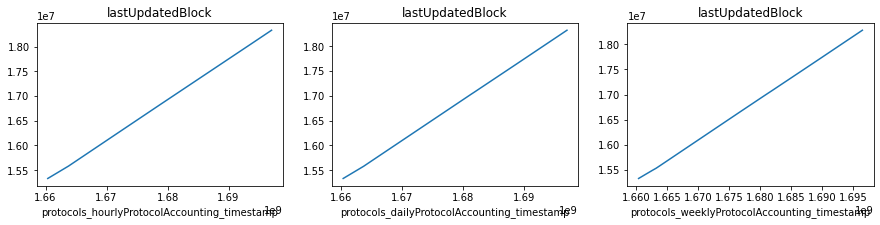

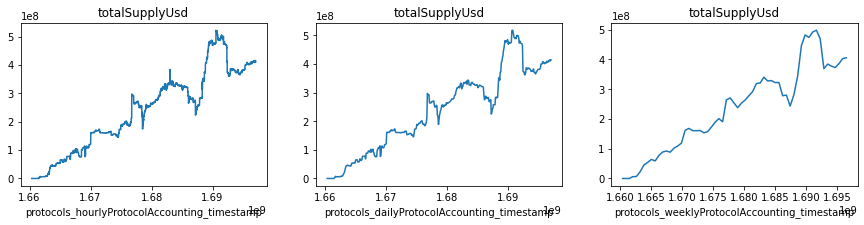

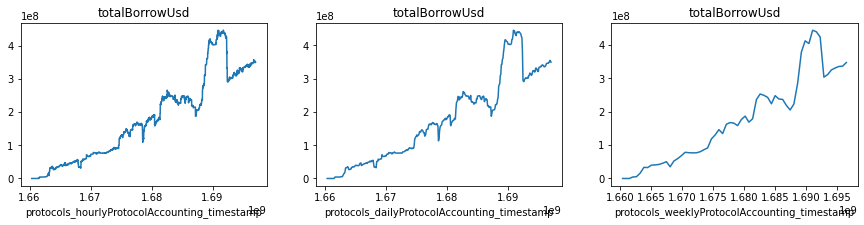

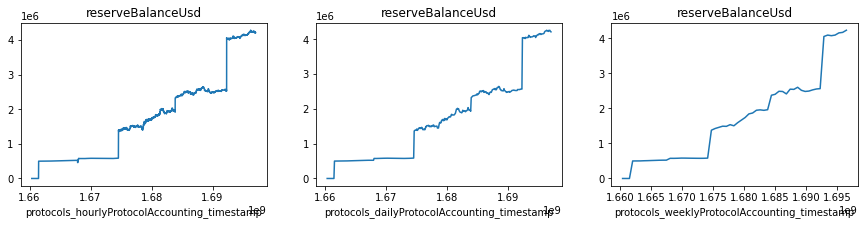

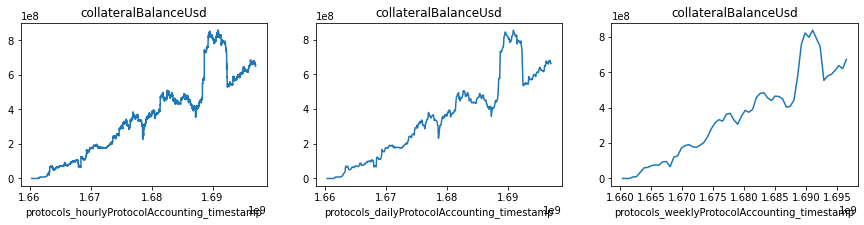

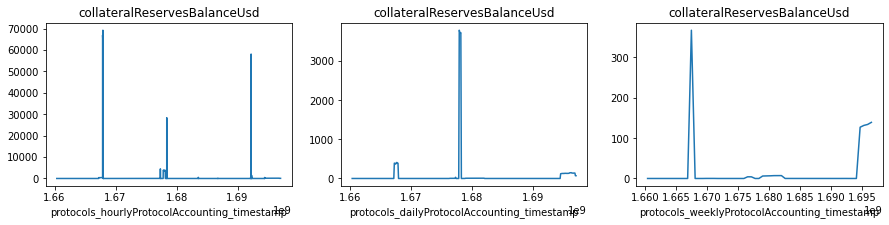

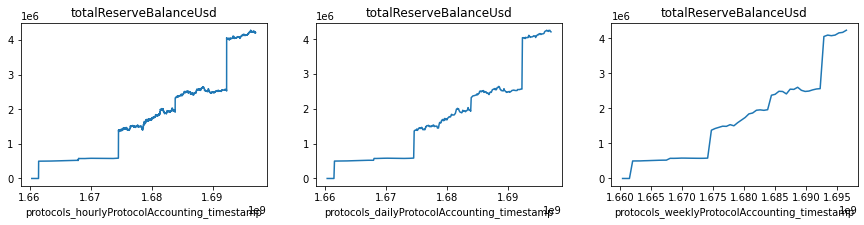

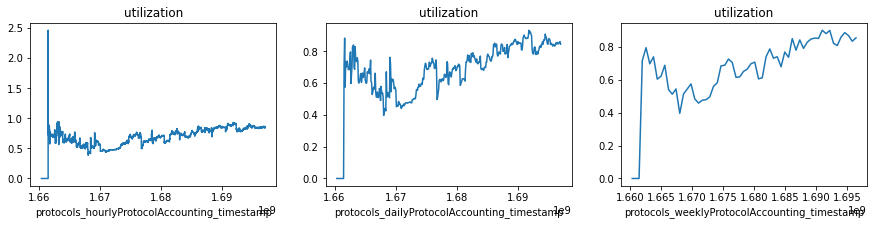

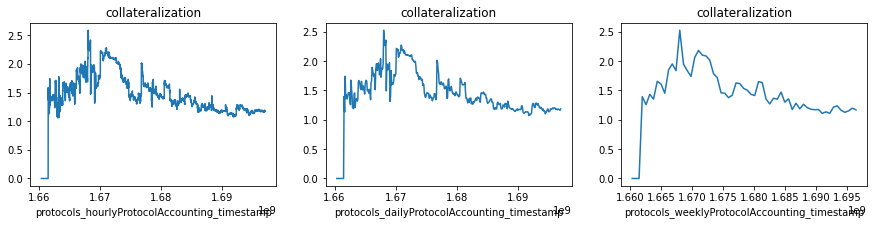

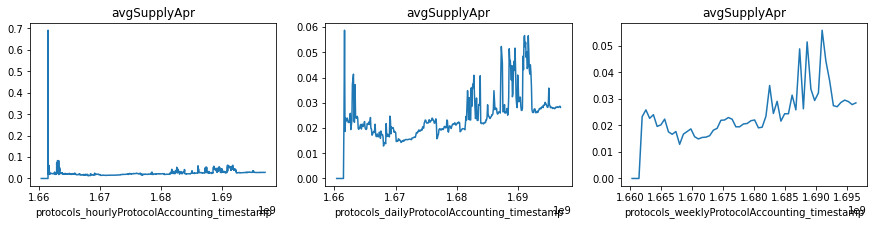

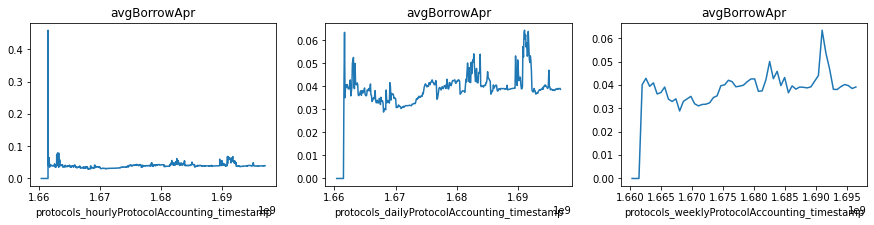

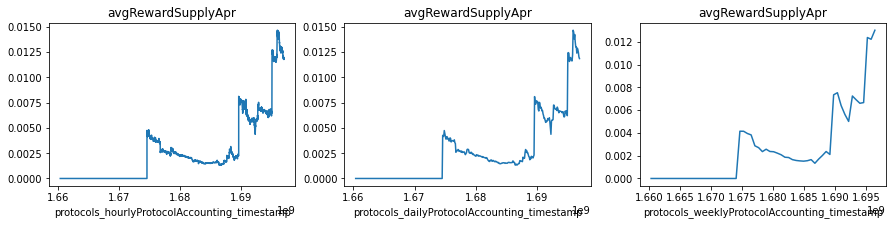

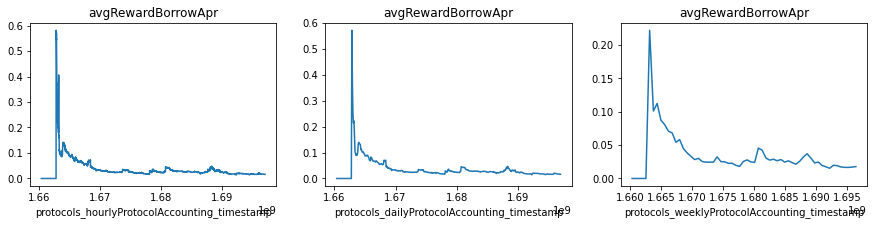

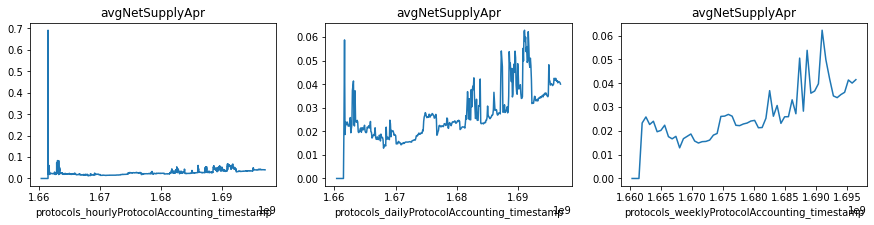

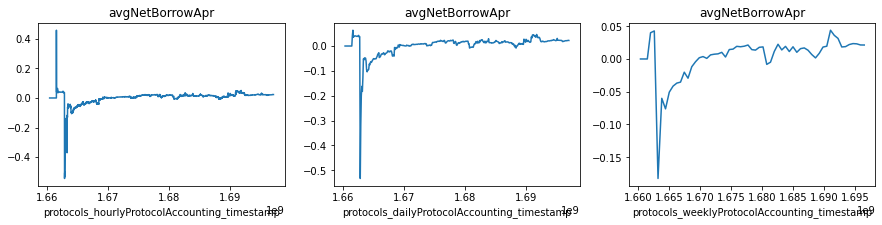

In [41]:
# Protocol Historical Accounting

hourly = comp_v3.Query.protocols.hourlyProtocolAccounting(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyProtocolAccounting(orderBy="timestamp", first=100000000)
weekly = comp_v3.Query.protocols.weeklyProtocolAccounting(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

plot_all([hourly_df, daily_df, weekly_df], ["protocols_hourlyProtocolAccounting_timestamp", "protocols_dailyProtocolAccounting_timestamp", "protocols_weeklyProtocolAccounting_timestamp"], "Protocol Accounting (hourly, daily, weekly)")


Protocol Usage (hourly, daily)


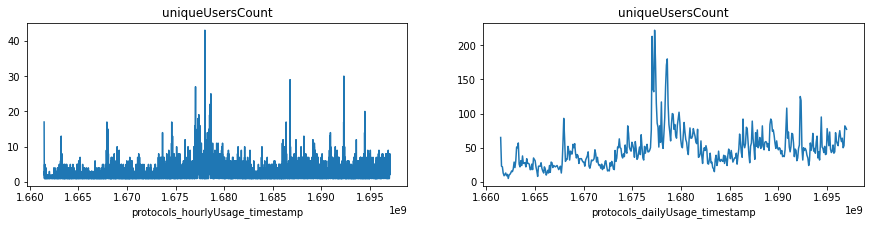

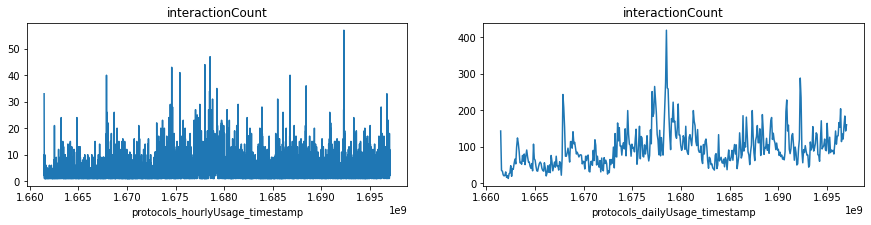

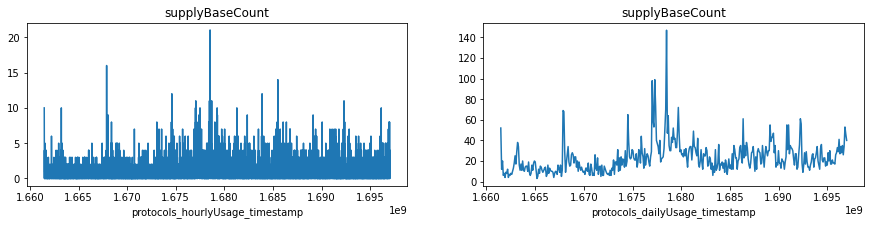

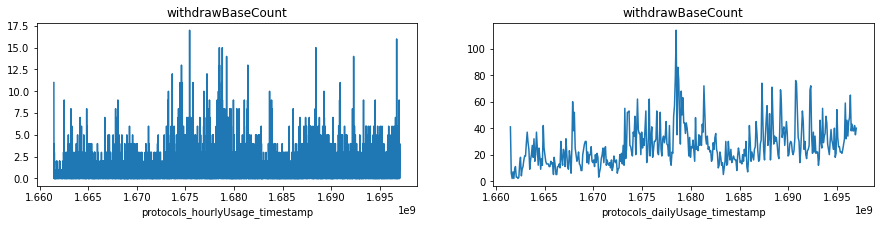

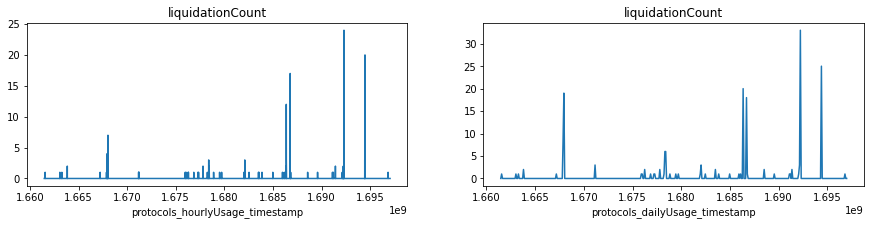

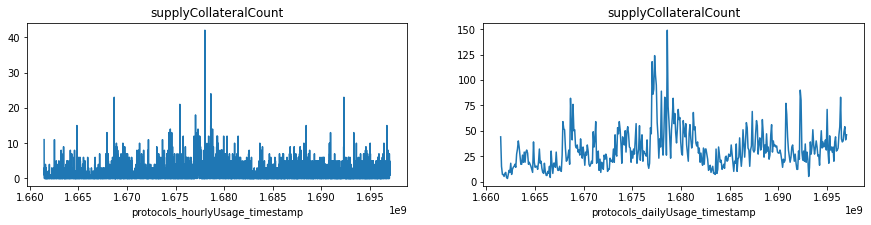

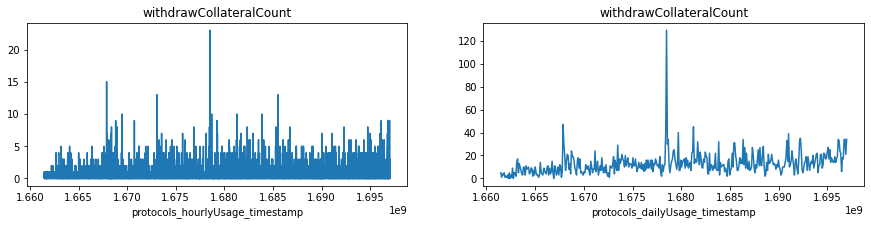

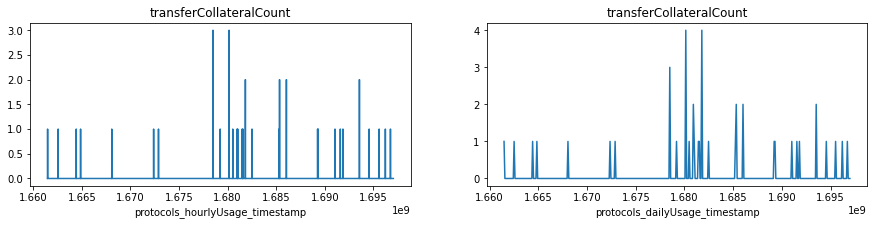

In [42]:
# Protocol historical usage

hourly = comp_v3.Query.protocols.hourlyUsage(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyUsage(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

# display(hourly_df)

plot_all([hourly_df, daily_df], ["protocols_hourlyUsage_timestamp", "protocols_dailyUsage_timestamp"], "Protocol Usage (hourly, daily)")


Compound WETH - Market Accounting (hourly, daily, weekly)


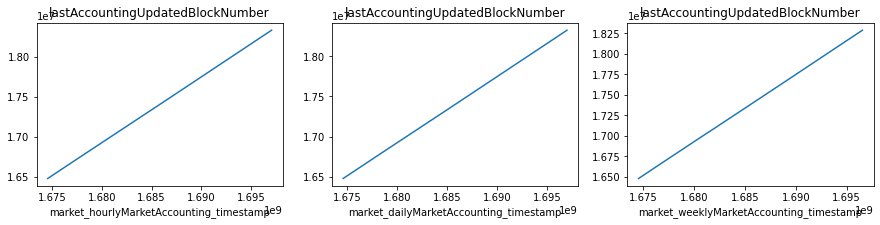

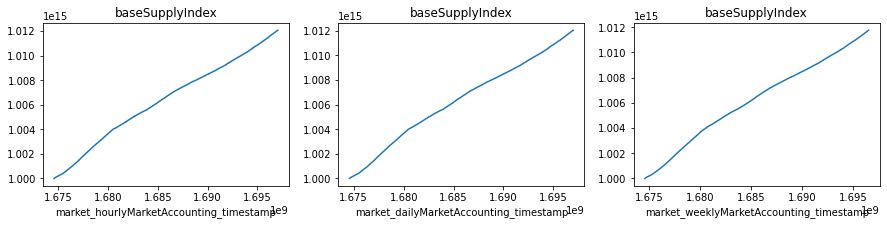

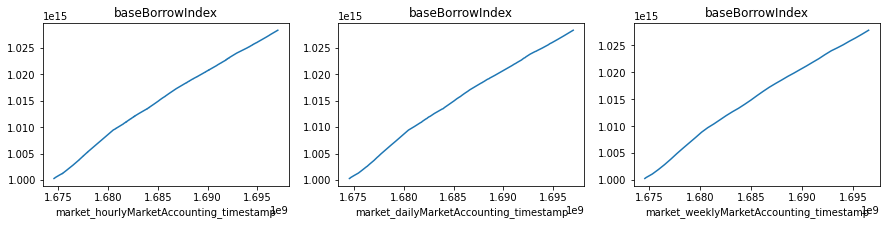

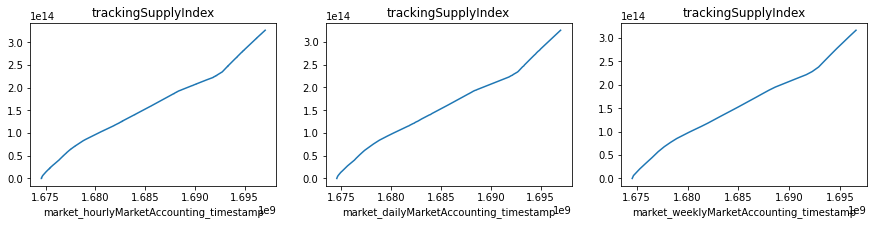

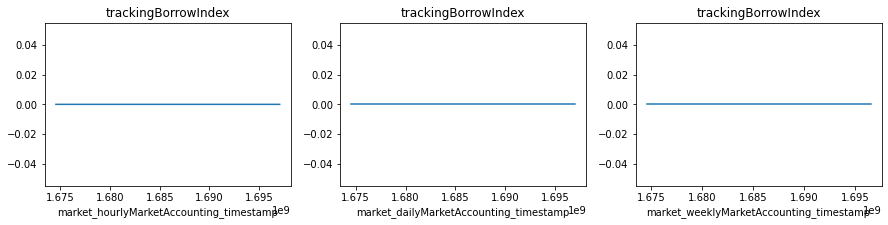

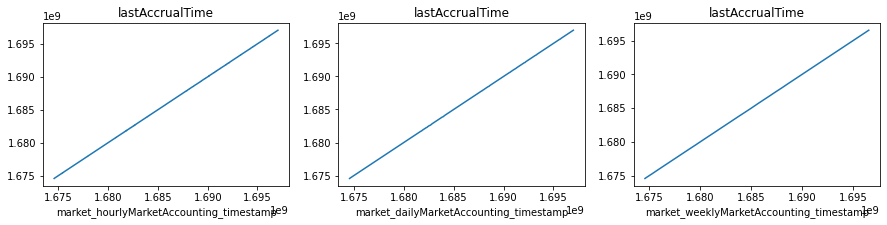

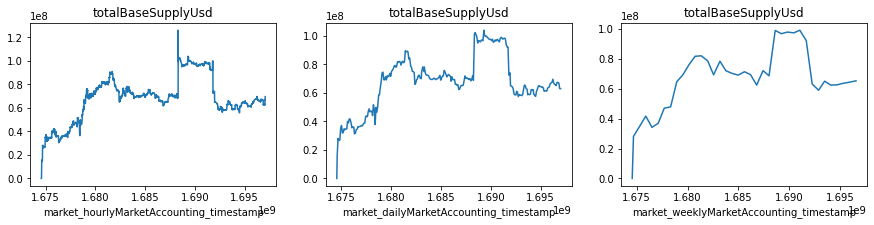

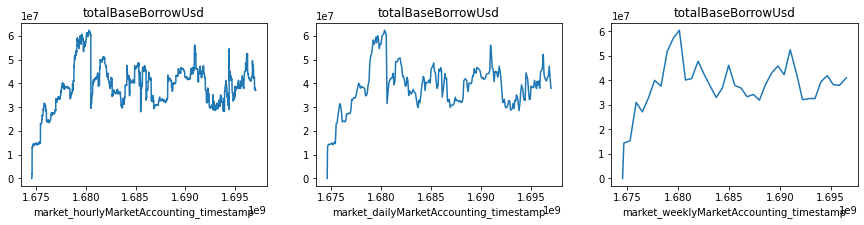

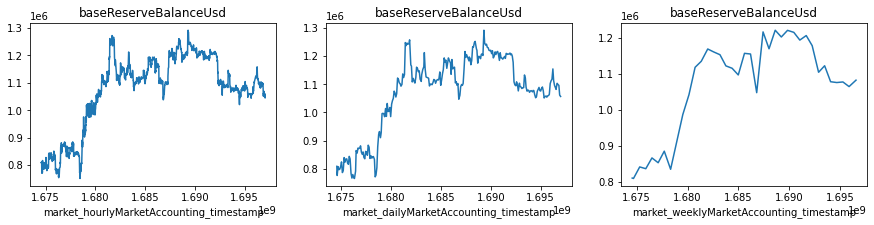

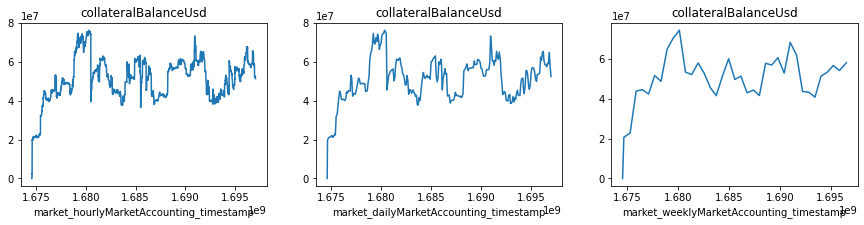

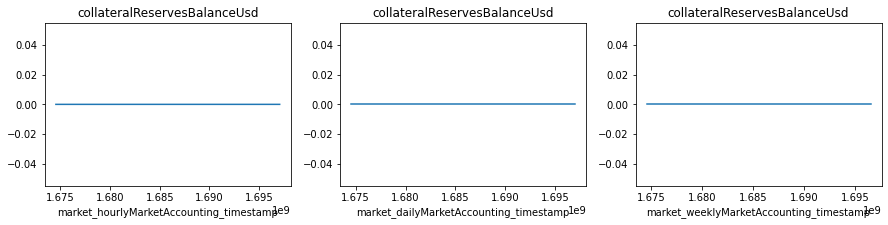

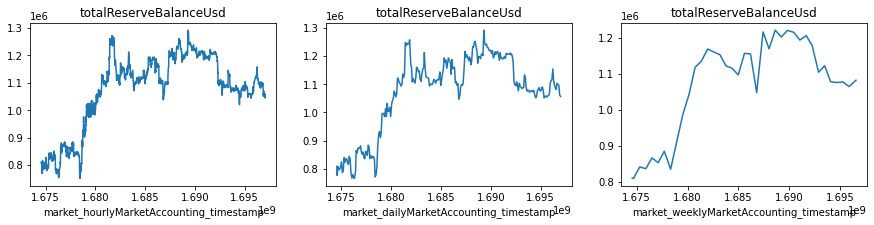

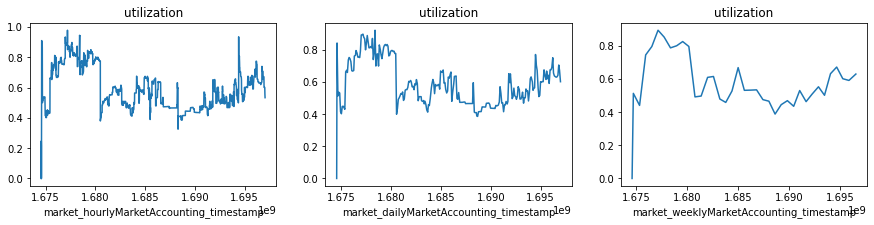

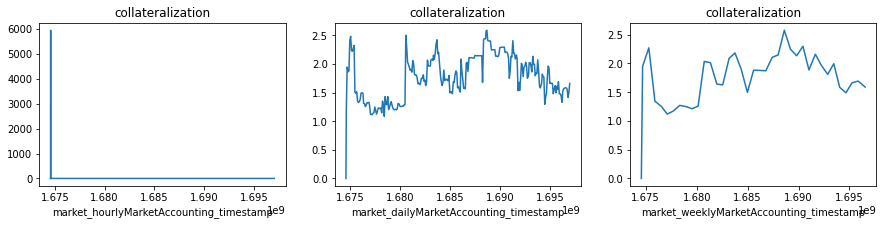

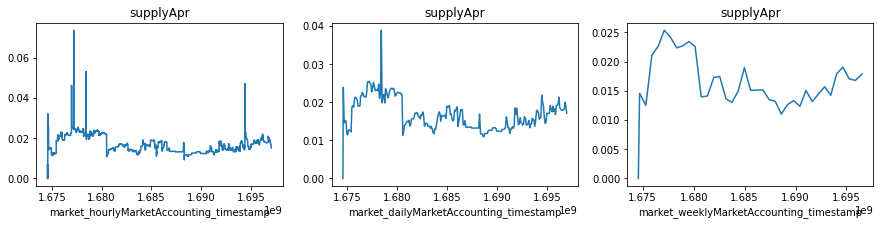

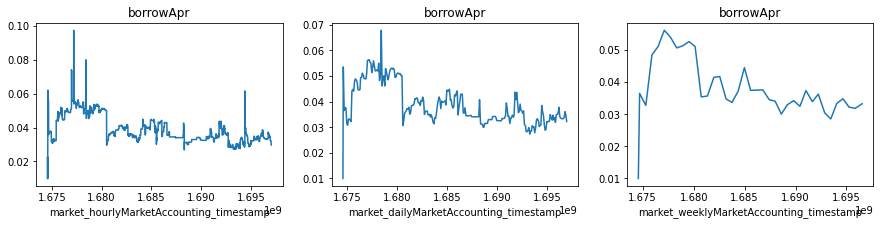

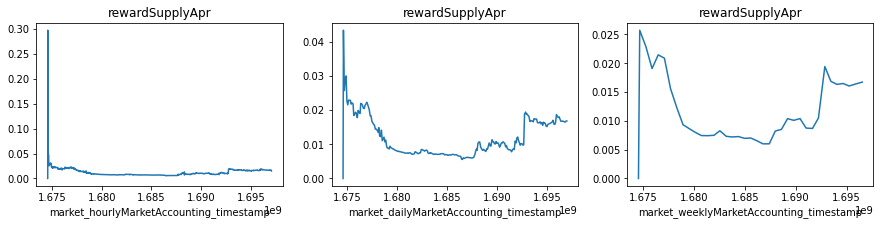

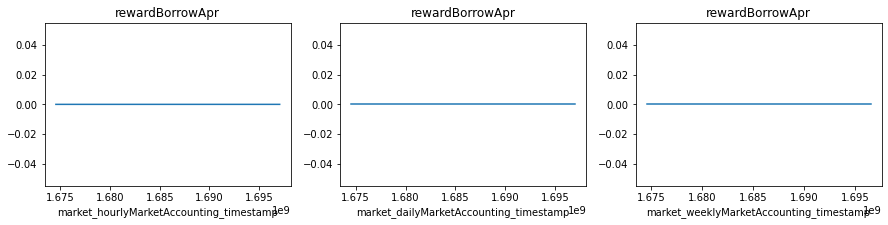

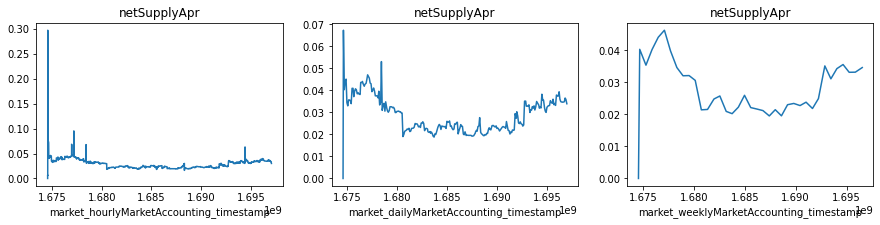

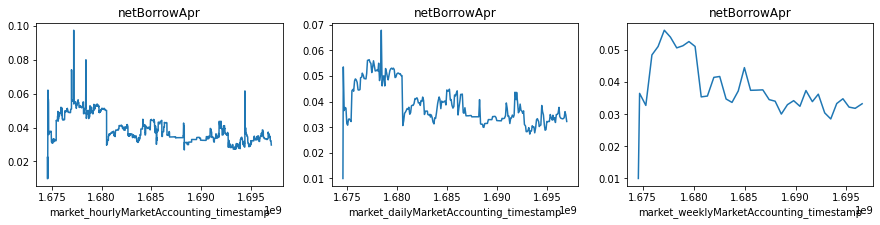

Compound USDC - Market Accounting (hourly, daily, weekly)


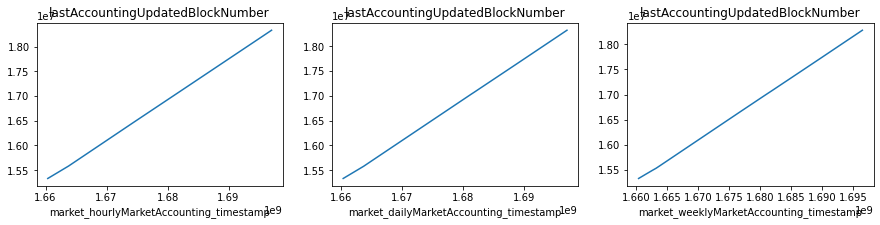

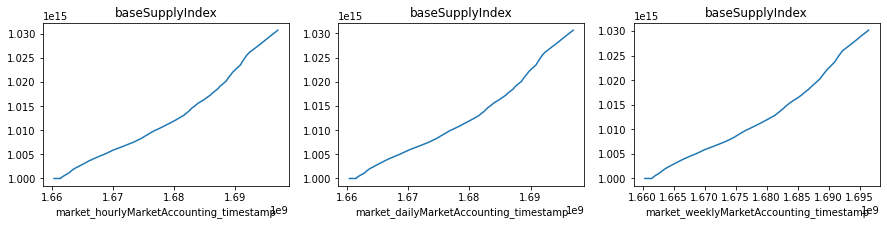

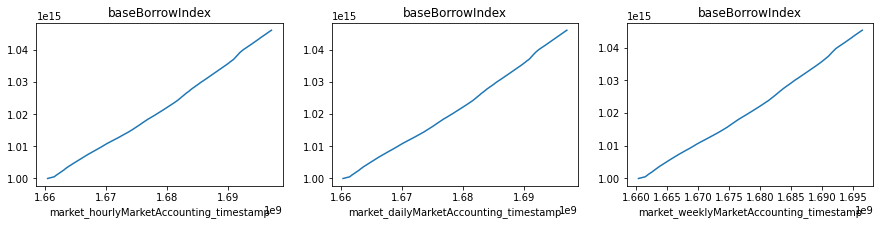

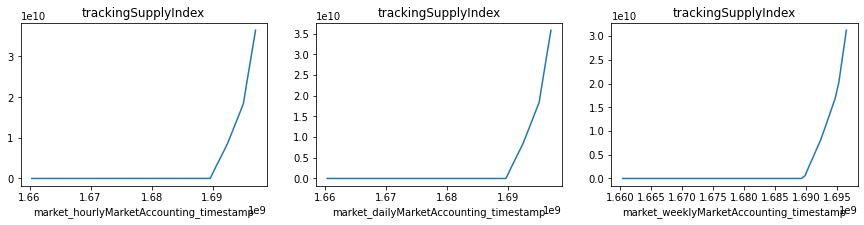

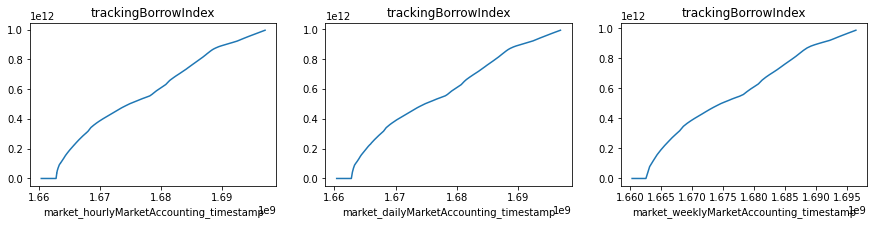

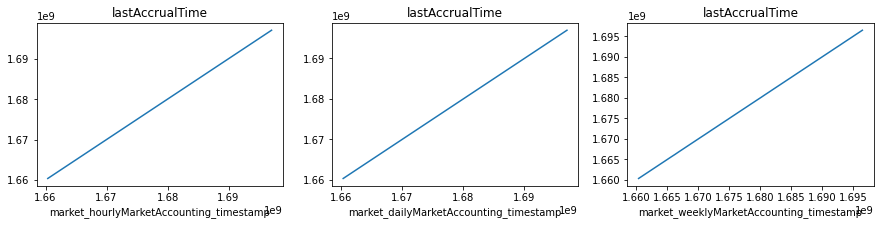

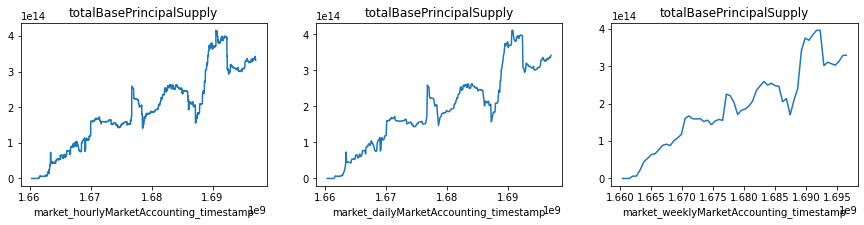

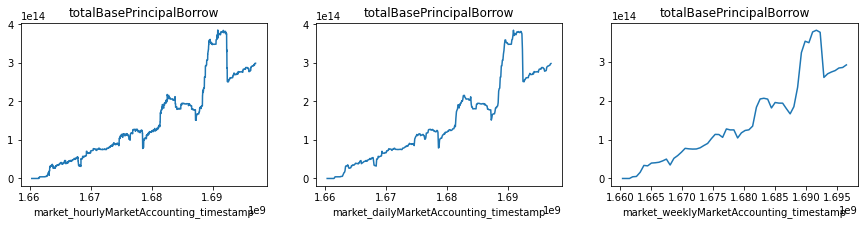

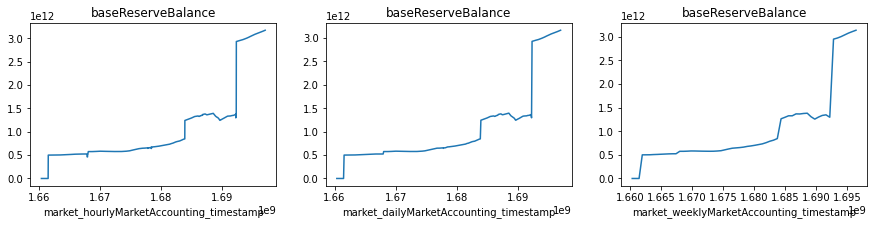

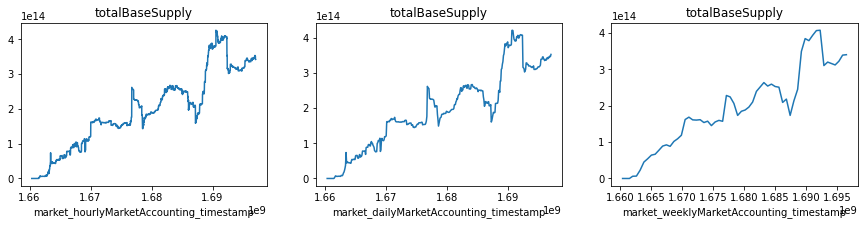

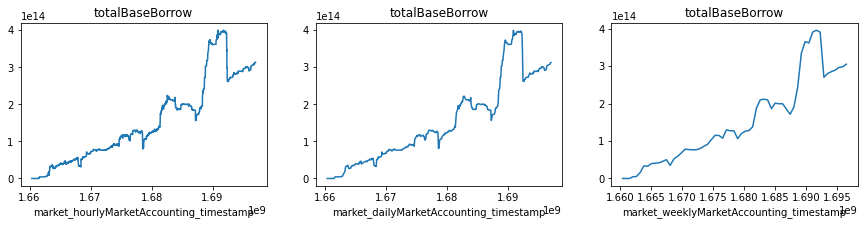

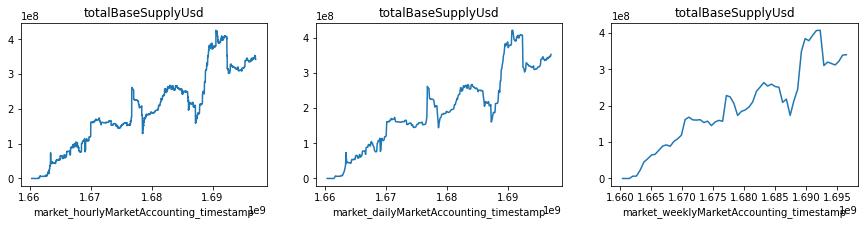

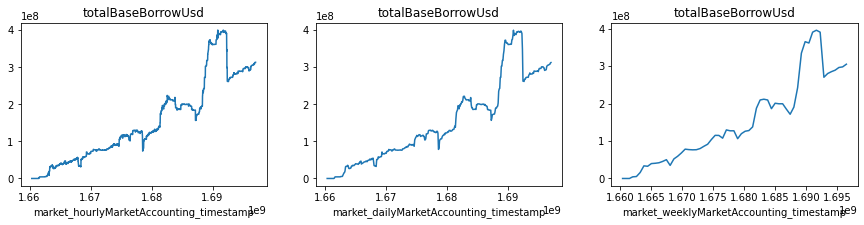

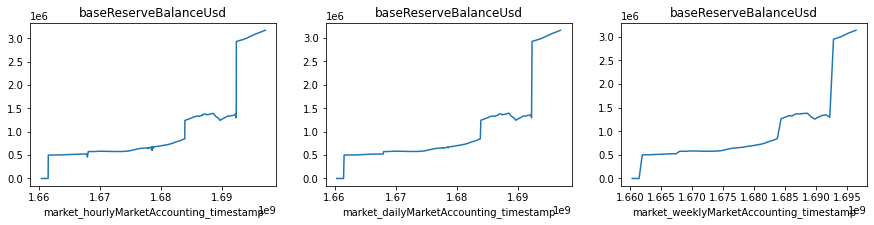

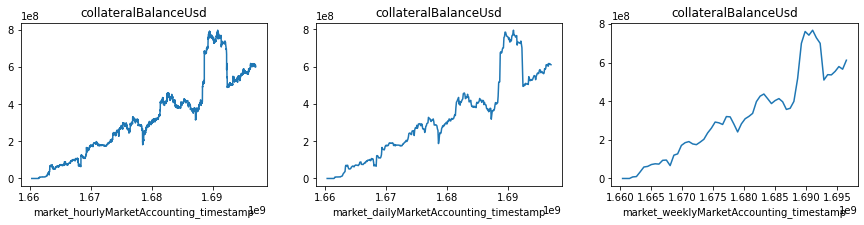

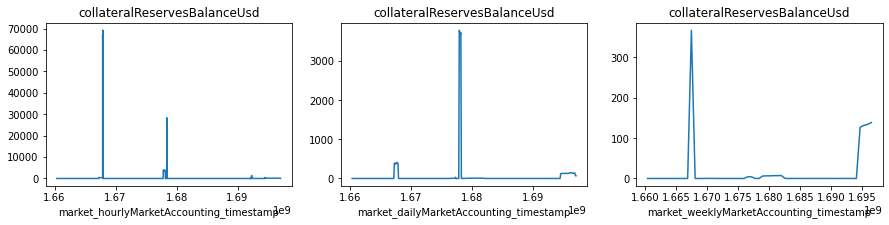

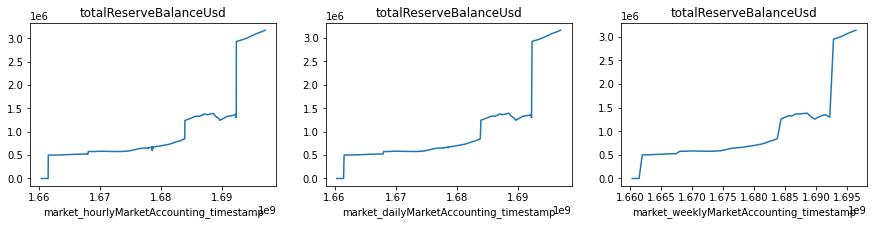

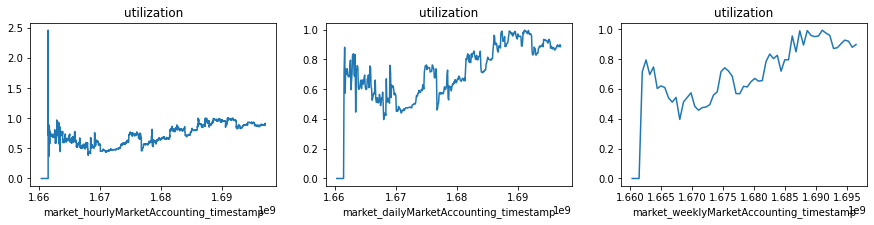

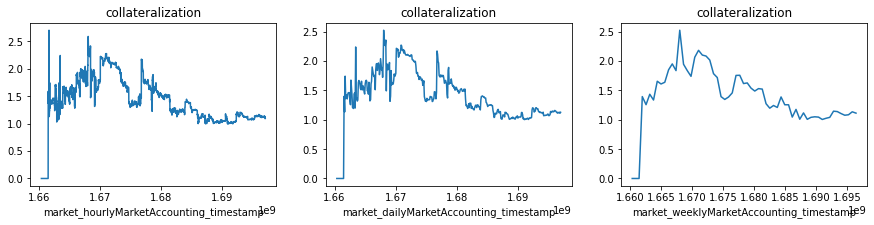

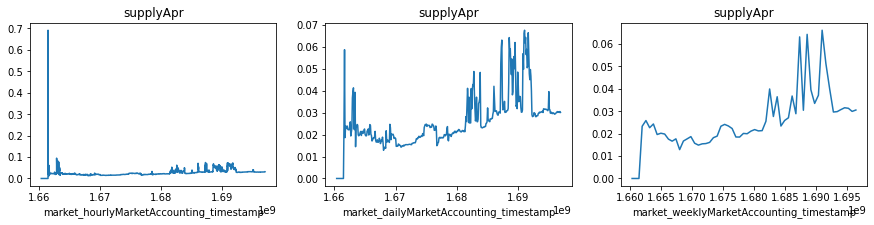

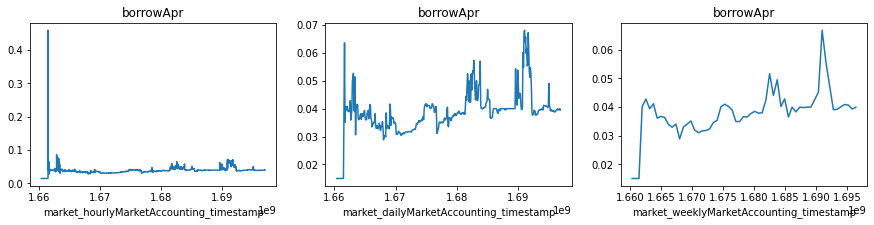

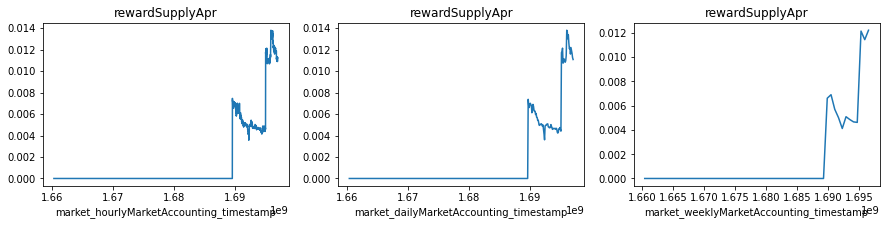

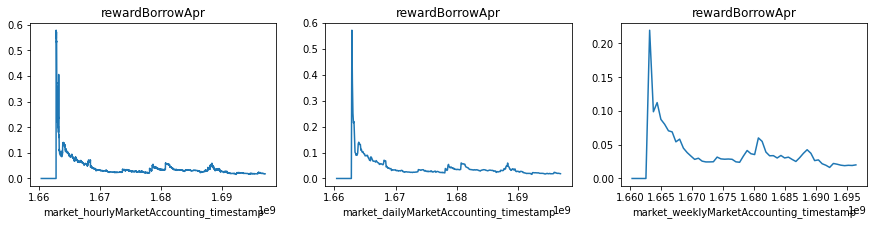

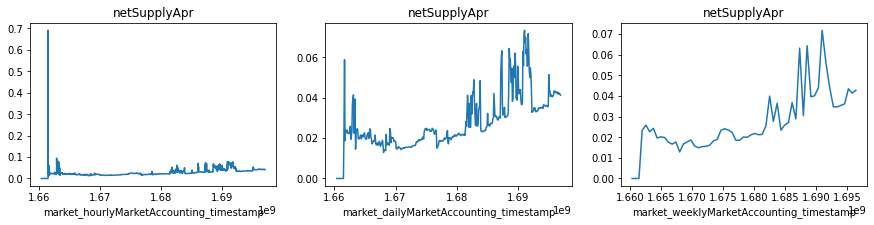

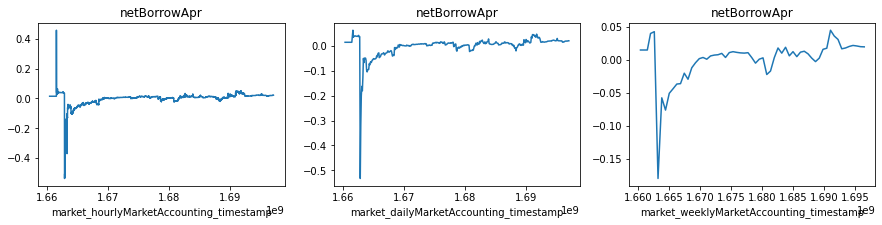

In [43]:
# Market Historical Accounting

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyMarketAccounting(orderBy="timestamp", first=100000000)
    daily = market.dailyMarketAccounting(orderBy="timestamp", first=100000000)
    weekly = market.weeklyMarketAccounting(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
    weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

    plot_all([hourly_df, daily_df, weekly_df], ["market_hourlyMarketAccounting_timestamp", "market_dailyMarketAccounting_timestamp", "market_weeklyMarketAccounting_timestamp"], f"{market_name} - Market Accounting (hourly, daily, weekly)")


Compound WETH - Market Configuration


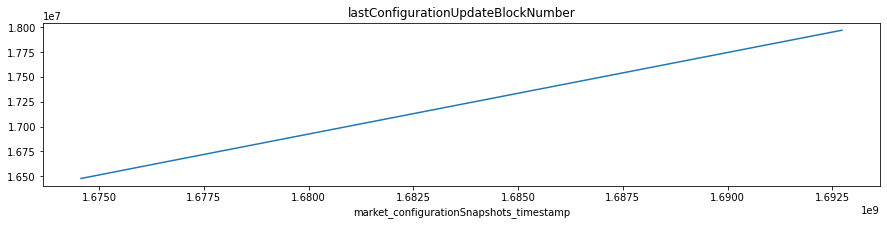

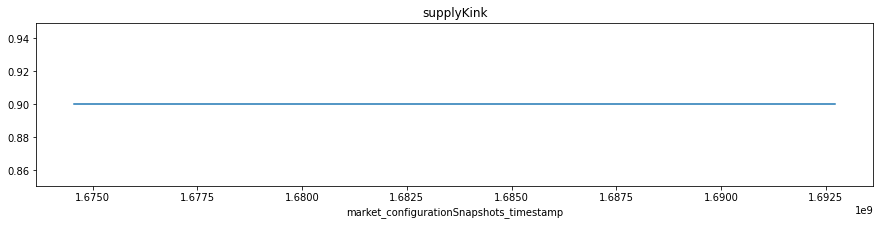

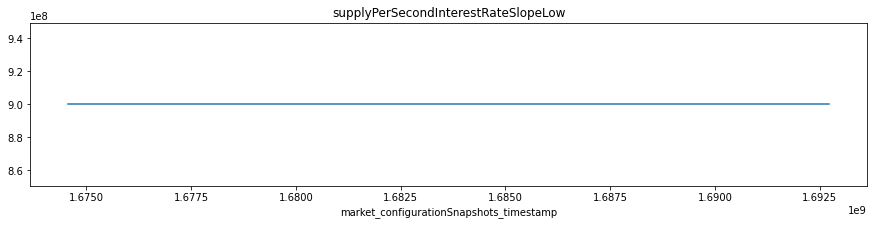

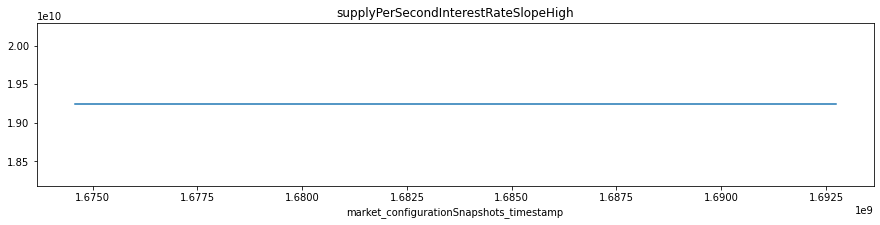

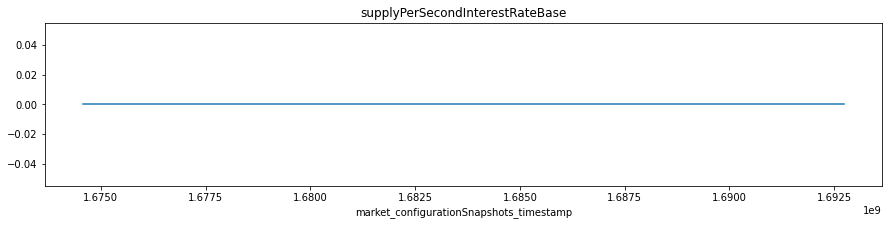

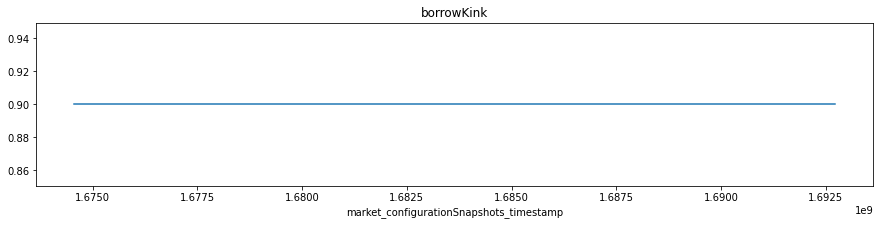

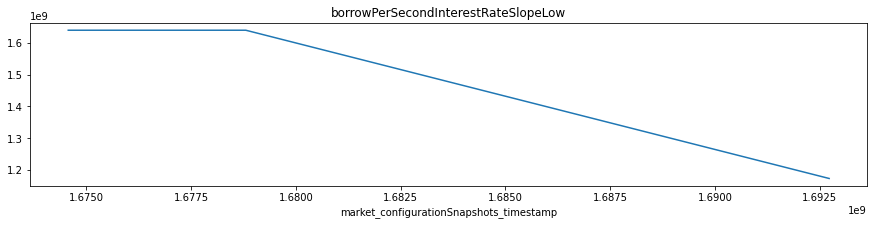

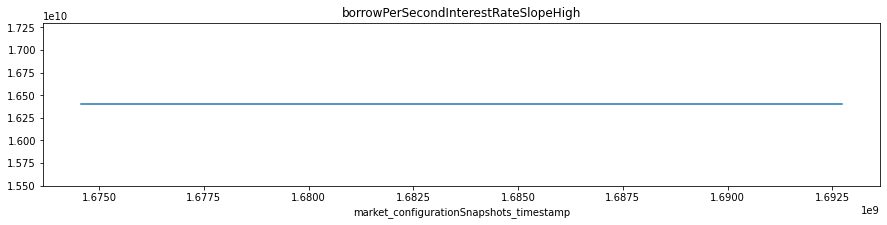

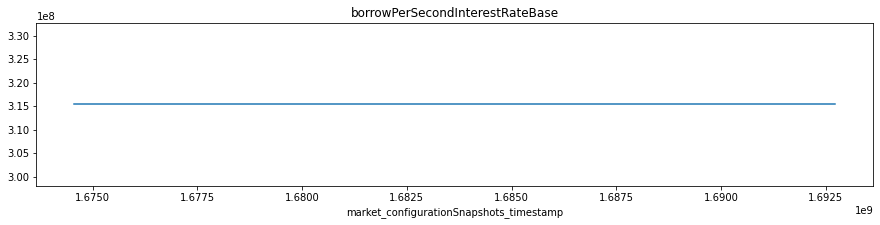

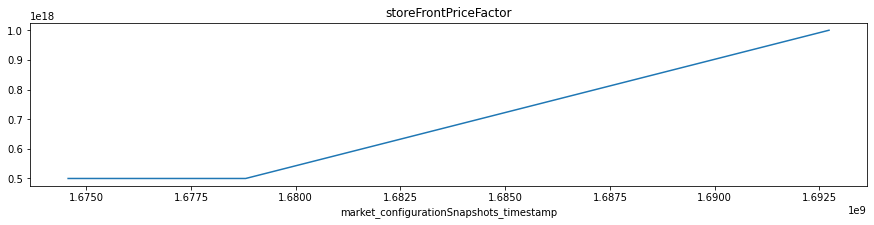

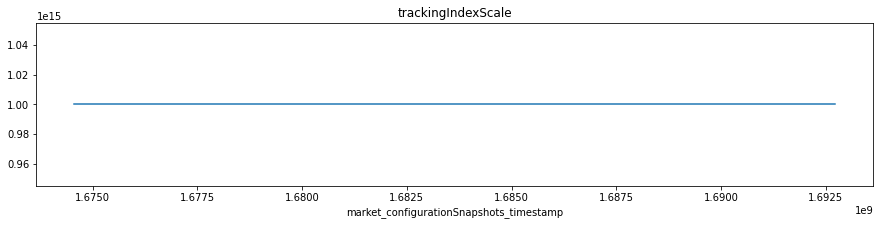

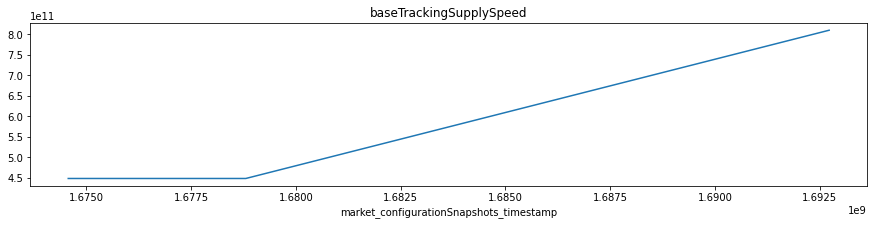

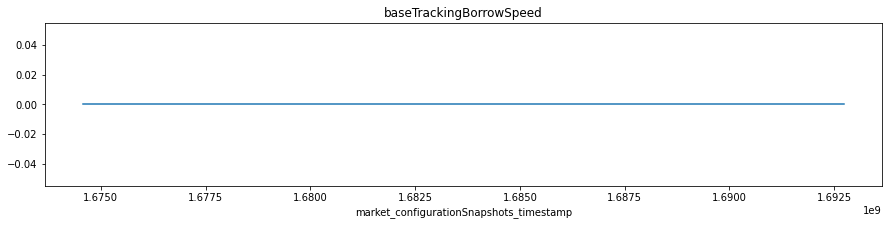

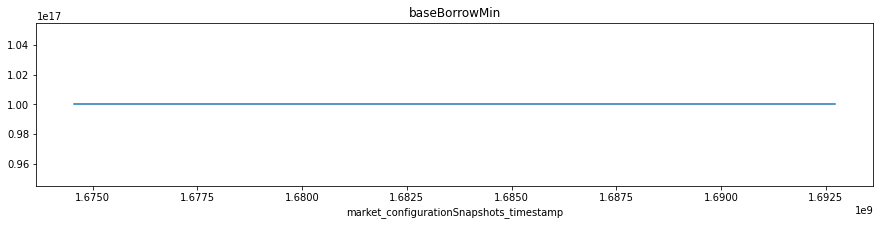

Compound USDC - Market Configuration


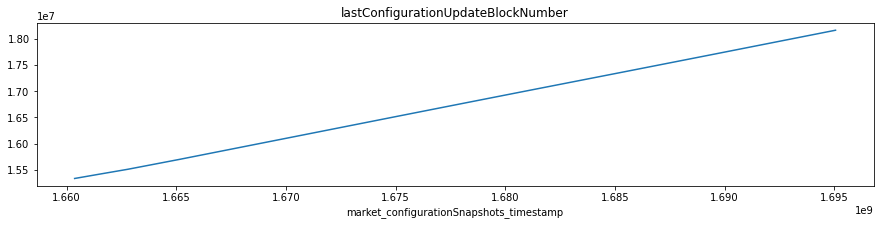

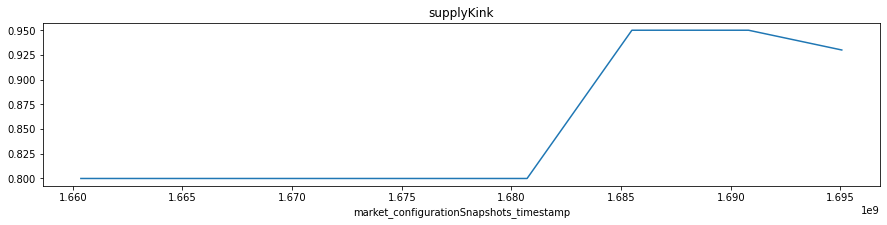

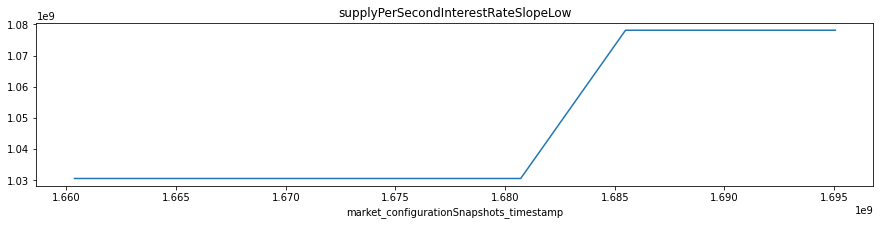

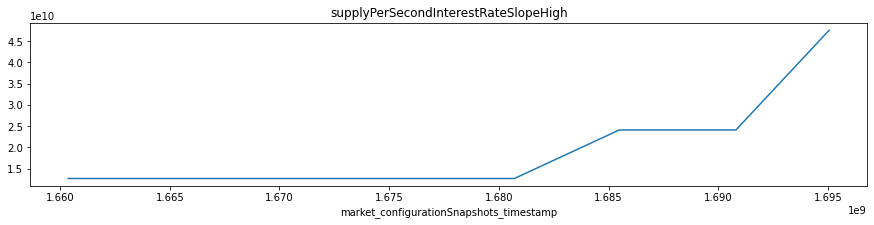

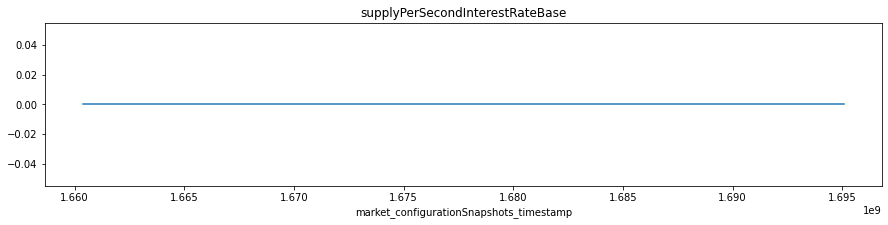

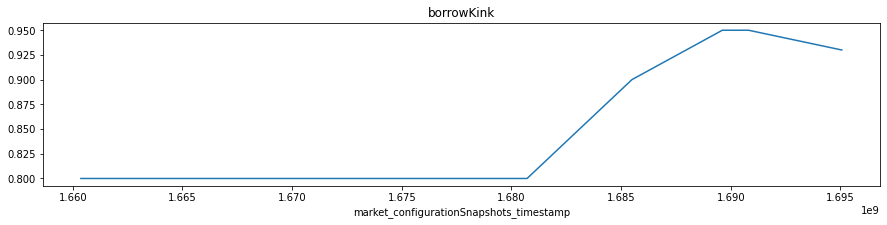

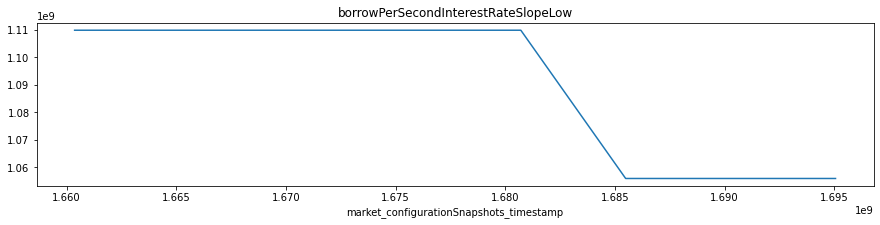

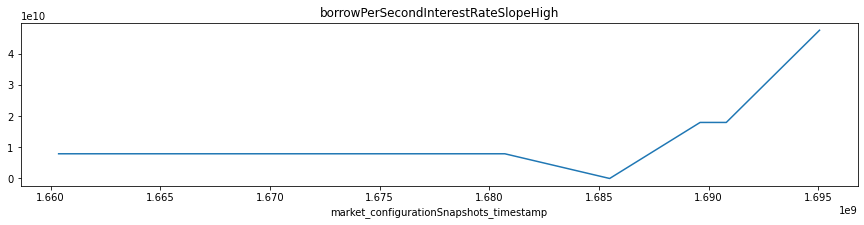

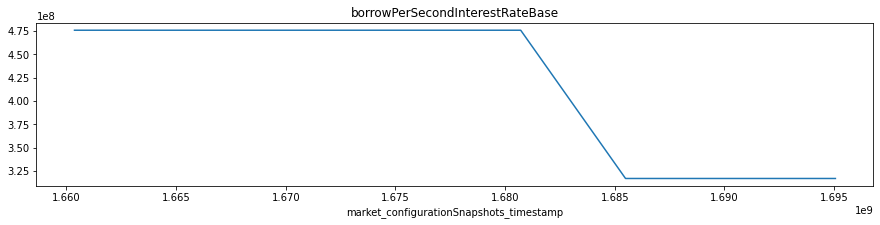

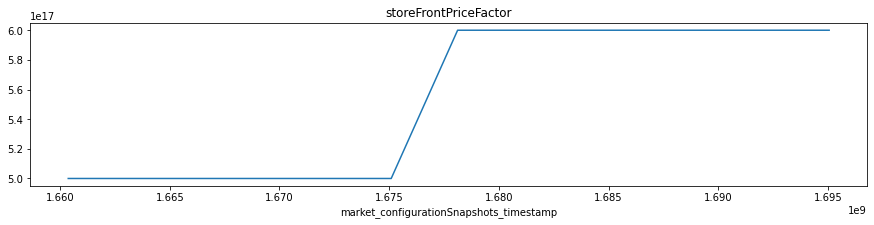

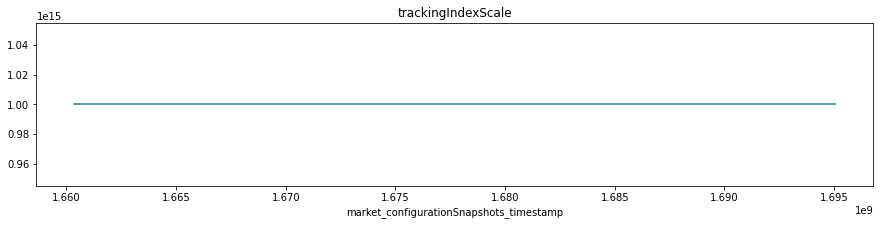

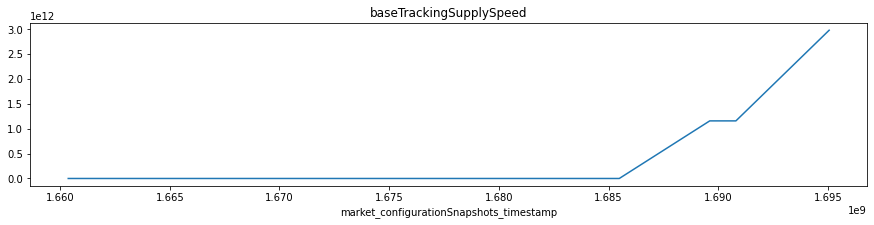

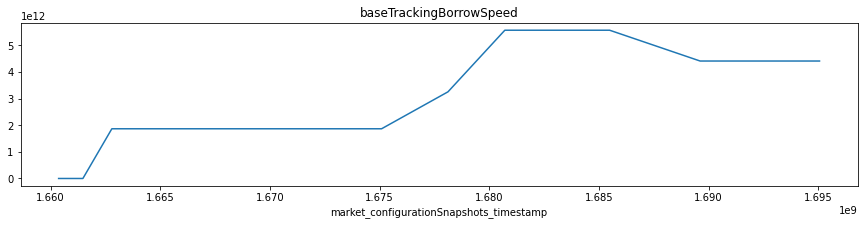

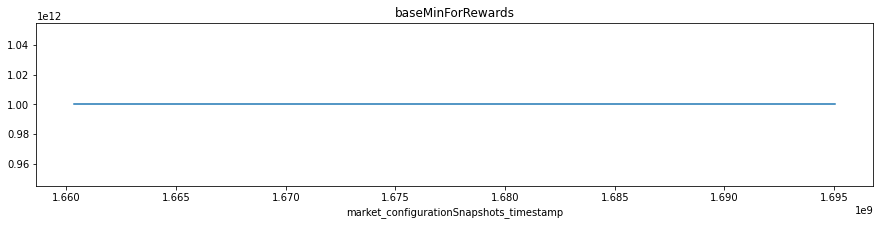

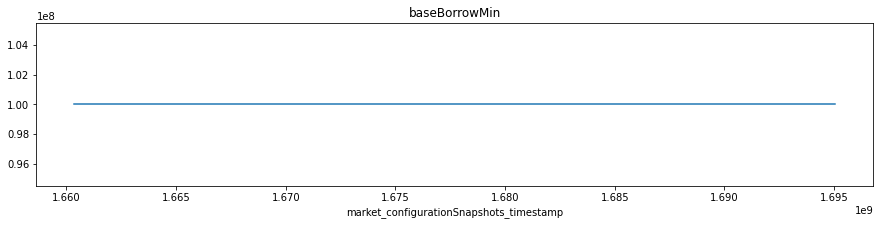

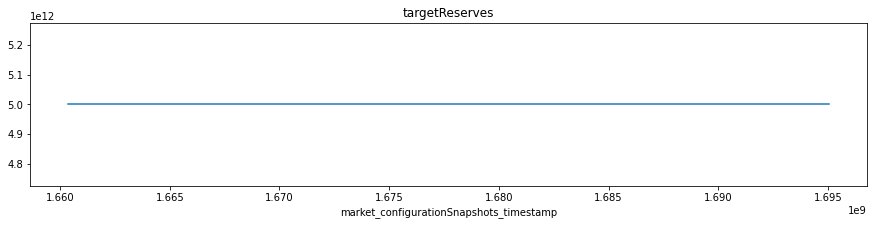

In [44]:
# Market Historical Configuration

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    snapshots = market.configurationSnapshots(orderBy="timestamp", first=100000000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.configuration], concat=True)

    # display(snapshots_df)

    plot_all([snapshots_df], ["market_configurationSnapshots_timestamp"], f"{market_name} - Market Configuration") 


Compound WETH - Market Usage (hourly, daily)


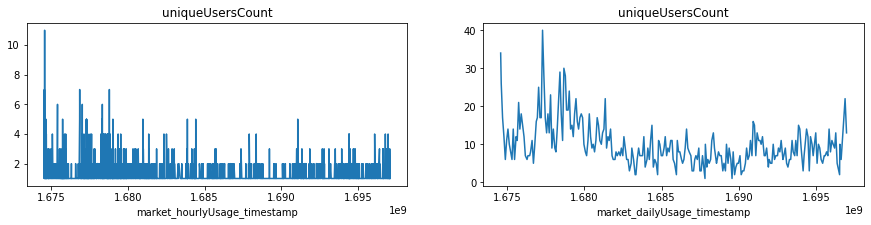

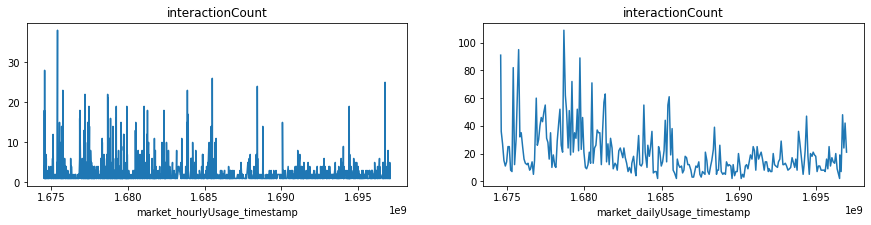

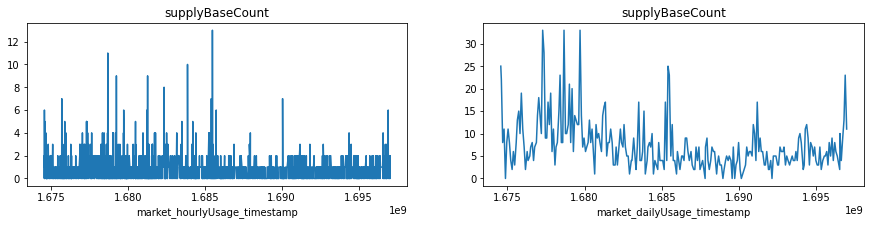

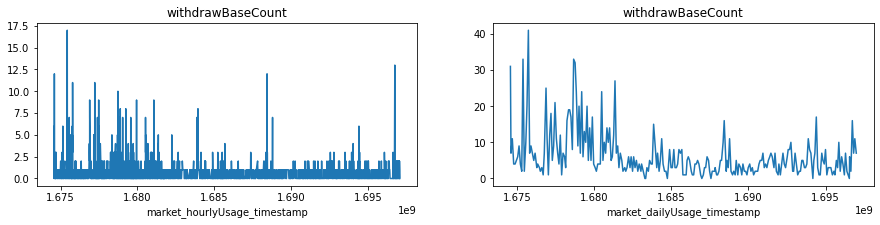

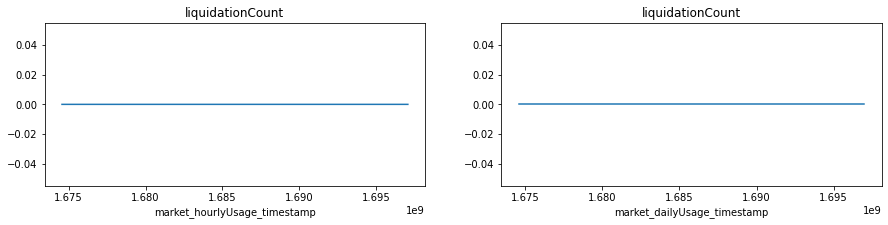

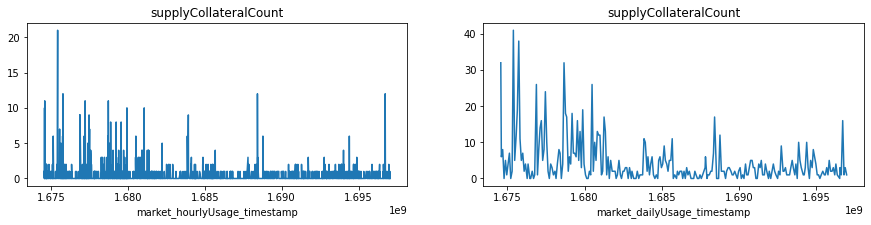

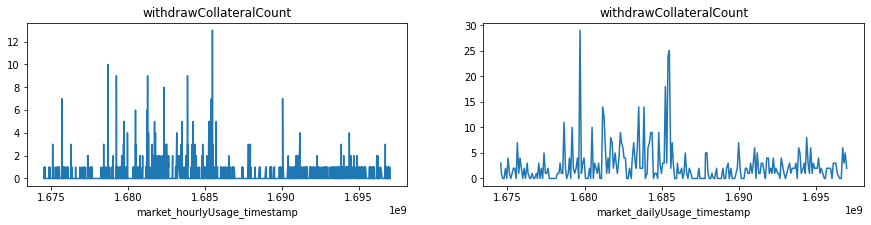

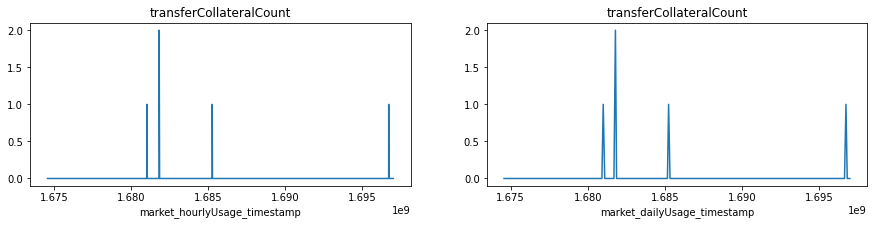

Compound USDC - Market Usage (hourly, daily)


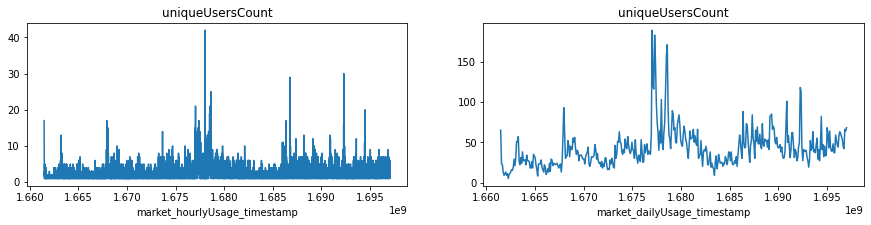

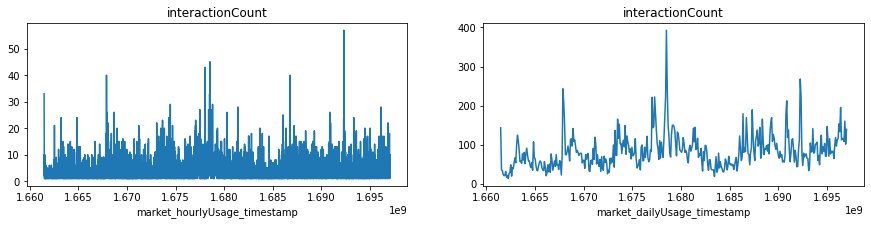

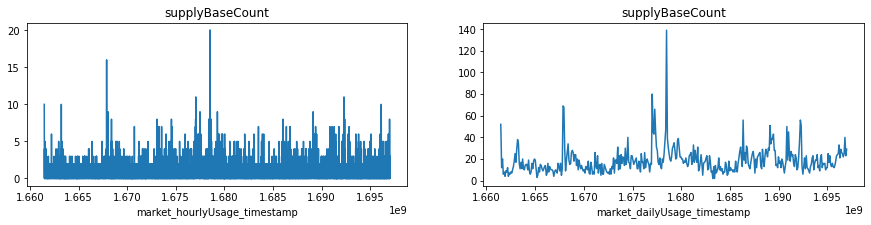

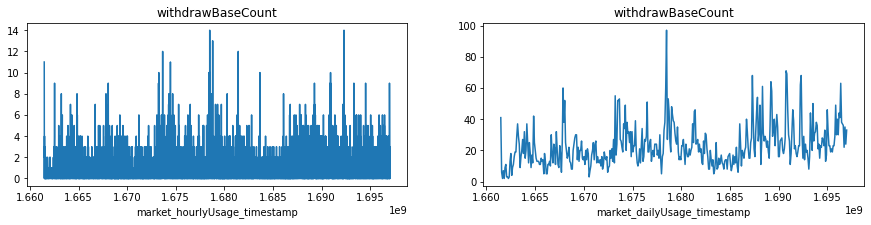

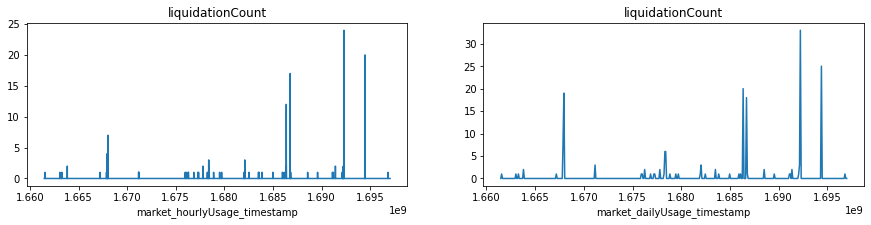

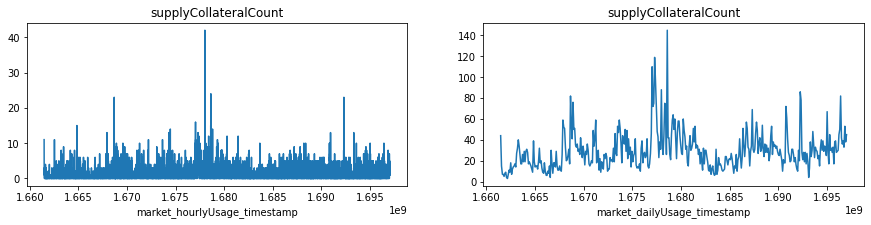

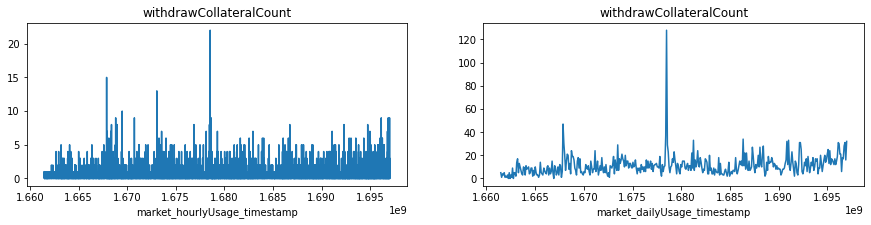

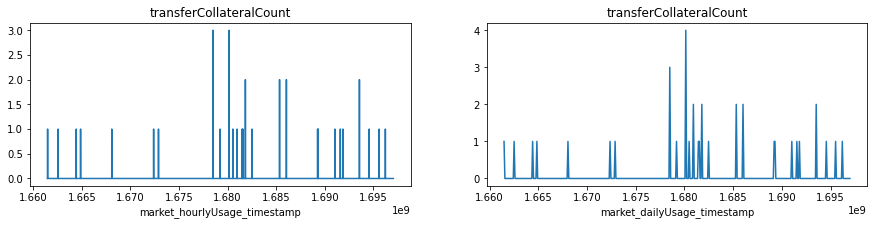

In [45]:
# Market Historical Usage

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyUsage(orderBy="timestamp", first=100000000)
    daily = market.dailyUsage(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

    # display(hourly_df)

    plot_all([hourly_df, daily_df], ["market_hourlyUsage_timestamp", "market_dailyUsage_timestamp"], f"{market_name} - Market Usage (hourly, daily)")


position_positionAccountingSnapshots_timestamp  \
0                                      1674602939   
1                                      1674603359   
2                                      1676034623   
3                                      1677029159   
4                                      1688312639   

                                               position_positionAccountingSnapshots_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035dd476fb005e01   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035df776fb000f01   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d2846fd003801   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d1087fe005102   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d77aa0c01f900   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                                                16479956   
1                                                                16479991   
2                                                                16598568   
3                                                                16680720   
4                                                                17607287   

                          position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                                                             0   
1                                       -2699152246434178339105   
2                                                             0   
3                                                             0   
4                                       29767562379533695489604   

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                                                           0   
1                                     -2699998106643255971550   
2                                                           0   
3                                                           0   
4                                     29999928024283075857734   

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                                                  0   
1                                                                  0   
2                                                     34872010497335   
3                                                     34872010497335   
4                                                    192401479542966   

   position_positionAccountingSnapshots_accounting_baseTrackingAccrued  \
0                                                                    0   
1                                                                    0   
2                                                                    0   
3                                                                    0   
4                                                                    0   

   position_positionAccountingSnapshots_accounting_baseBalanceUsd  \
0                                                    0.000000e+00   
1                                                   -4.198082e+06   
2                                                    0.000000e+00   
3                                                    0.000000e+00   
4                                                    5.753476e

0x10d88638be3c26f3a47d861b8b5641508501035d - Position Accounting


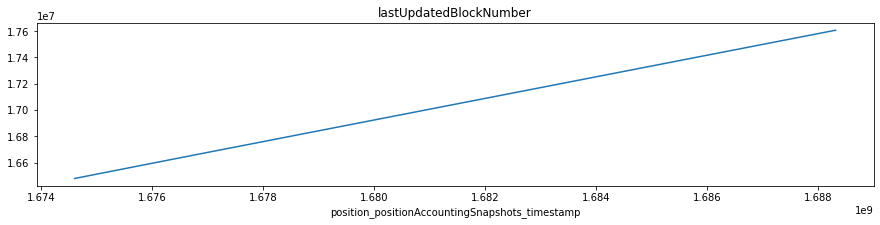

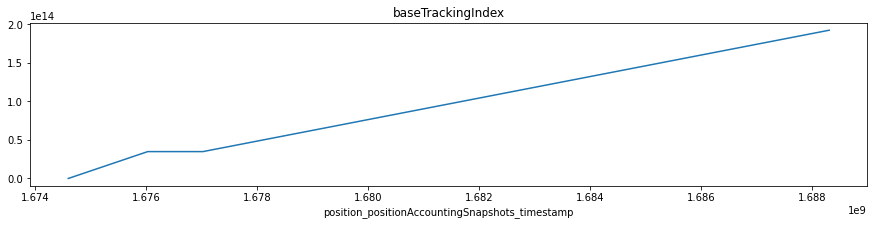

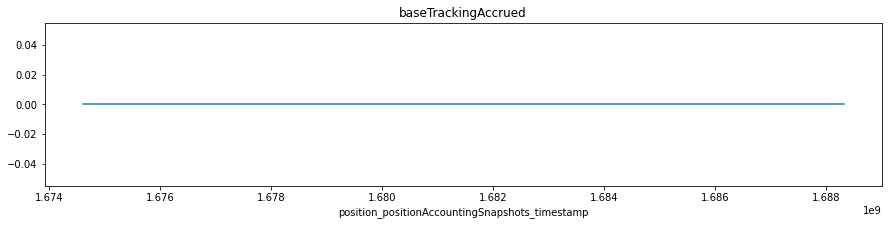

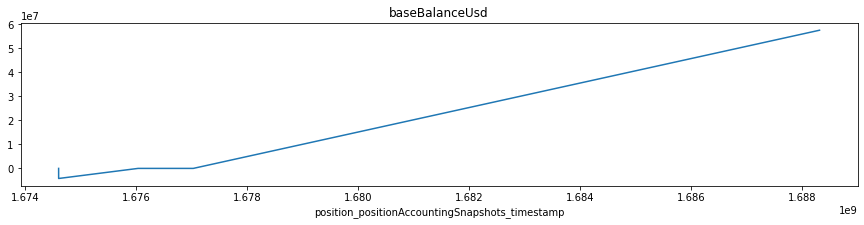

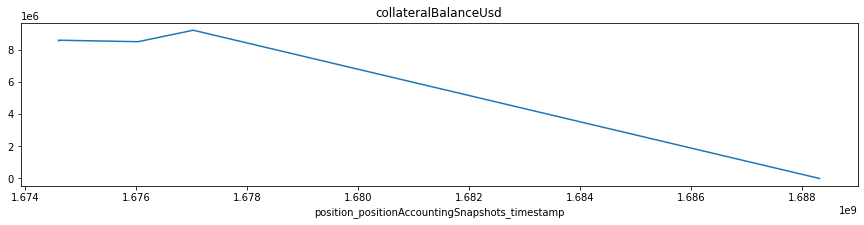

position_positionAccountingSnapshots_timestamp  \
0                                      1674955307   
1                                      1678188611   
2                                      1679226011   

                                               position_positionAccountingSnapshots_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a661f1c909ca13ba3e9114bfdd81e5a420705debe8fb003001   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a661f1c909ca13ba3e9114bfdd81e5a420705dc8fbff004301   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a661f1c909ca13ba3e9114bfdd81e5a420705d59490101c400   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                                                16509163   
1                                                                16776136   
2                                                                16861529   

                          position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a661f1c909ca13ba3e9114bfdd81e5a420705d   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a661f1c909ca13ba3e9114bfdd81e5a420705d   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a661f1c909ca13ba3e9114bfdd81e5a420705d   

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                                        4998992912709162021052   
1                                        9987274672306803706351   
2                                        6488079088093233054305   

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                                      4999911608071404274188   
1                                     10010652824233716372746   
2                                      6508075815131431149190   

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                                     13160348387806   
1                                                     74986062056113   
2                                                     88416382695334   

   position_positionAccountingSnapshots_accounting_baseTrackingAccrued  \
0                                                                    0   
1                                                            309066304   
2                                                            443198605   

   position_positionAccountingSnapshots_accounting_baseBalanceUsd  \
0                                                    8.074072e+06   
1                                                    1.565155e+07   
2                                                    1.157396e+07   

   position_positionAccountingSnapshots_accounting_collateralBalanceUsd  
0                                                                   0.0  
1                                                                   0.0  
2                                                                   0.0

0x59a661f1c909ca13ba3e9114bfdd81e5a420705d - Position Accounting


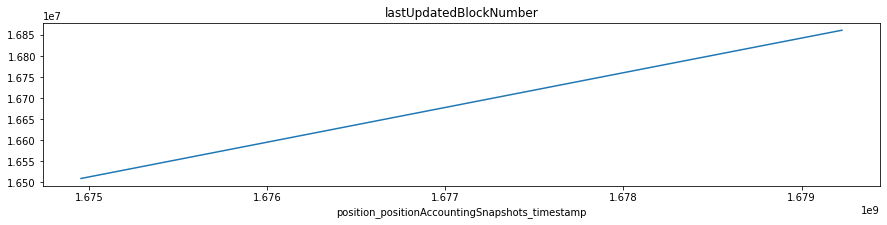

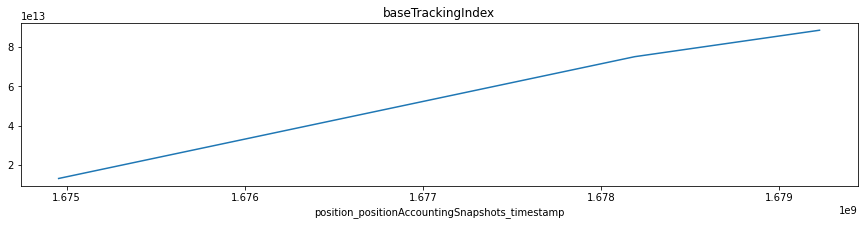

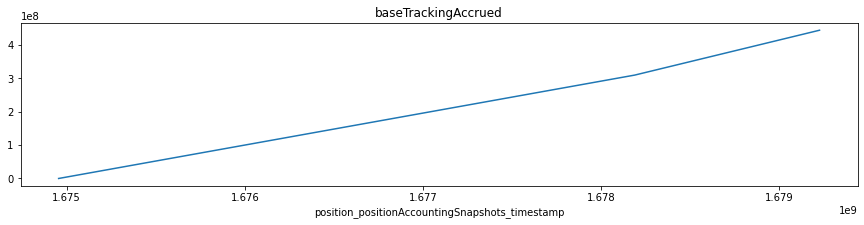

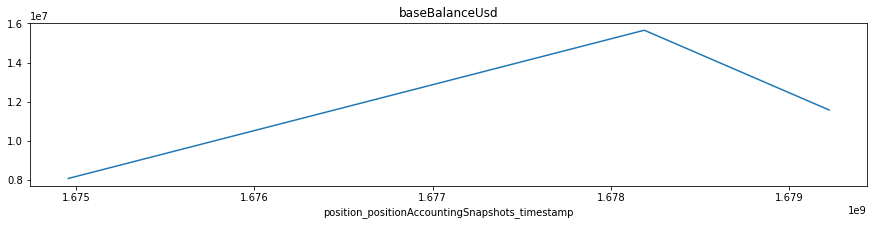

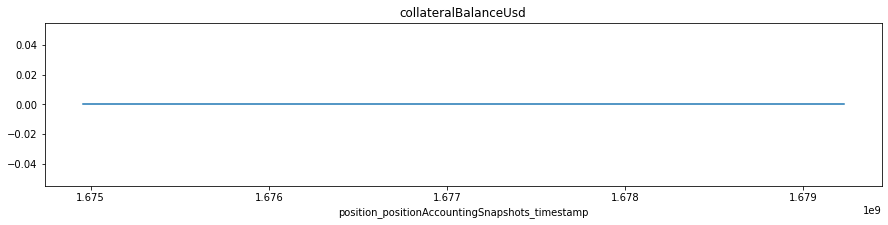

position_positionAccountingSnapshots_timestamp  \
0                                      1679002895   
1                                      1679100707   
2                                      1679360075   
3                                      1679442551   
4                                      1679885543   
5                                      1682127167   
6                                      1684661087   
7                                      1685230535   

                                               position_positionAccountingSnapshots_accounting_id  \
0    0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111830101011e   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace11101210101a400   
2    0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace1118674010168   
3    0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace1110e8f01015e   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111a31d02019a00   
5    0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace1118ae704015c   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111d81408015e01   
7  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111e1cb0801ce00   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                                                16843139   
1                                                                16851201   
2                                                                16872582   
3                                                                16879374   
4                                                                16915875   
5                                                                17098634   
6                                                                17306840   
7                                                                17353697   

                          position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
7  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                                        1495611660639103045586   
1                                        2492619296932021036835   
2                                        2991031405264710325736   
3                                        3190383911296082389104   
4                                        3489316150252825313068   
5                                        3986932876790128048818   
6                                        4483952340191455567254   
7                                        4980811694321167274634   

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                                      1499990178355031585977   
1                                      2500088549794042714902   
2                                      3000552292453074893445   
3                                      3200711974448191151470   
4                                      3501766242833111436321   
5                                      4005965943630807550749   
6                                      451082064471745588259

0x53fb0162bc8d5eec2fb1532923c4f8997bace111 - Position Accounting


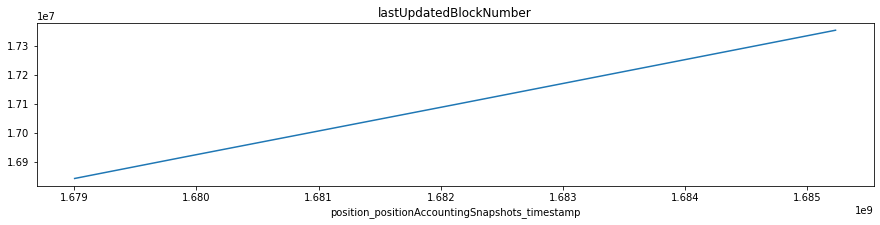

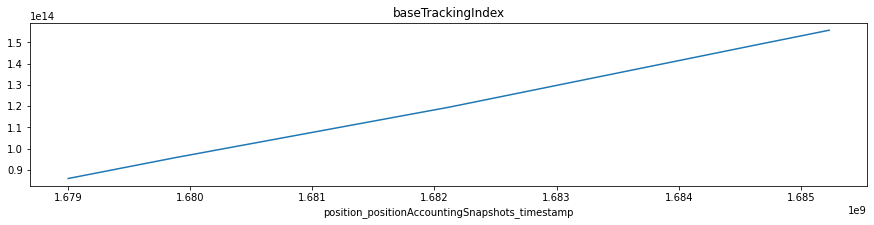

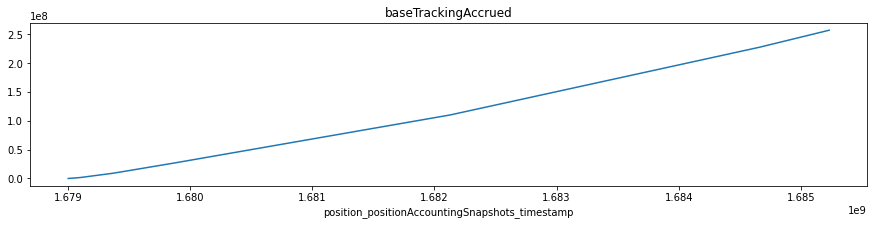

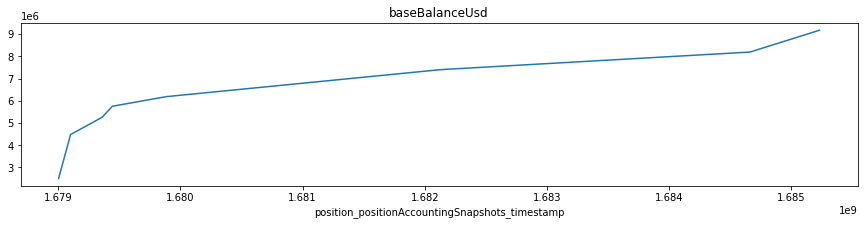

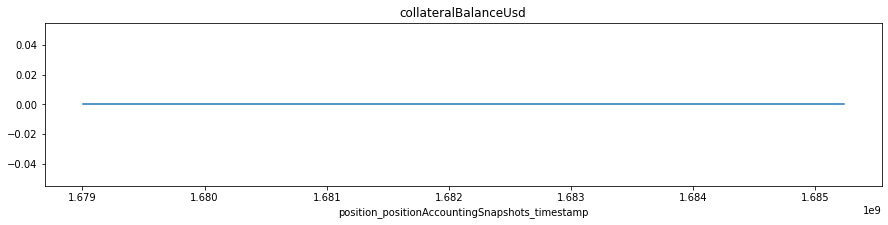

In [46]:
# Position Accounting 

positions = comp_v3.Query.positions(first=3, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
positions_df = sg.query_df([positions.id, positions.account.address])

# display(positions_df)

for index, row in positions_df.iterrows():
    position_address = row["positions_account_address"]
    position_id = row["positions_id"]

    snapshots = comp_v3.Query.position(id=position_id).positionAccountingSnapshots(orderBy="timestamp", first=10000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.accounting], concat=True)

    display(snapshots_df)

    plot_all([snapshots_df], ["position_positionAccountingSnapshots_timestamp"], f"{position_address} - Position Accounting") 
